# **CASE STUDY II: HEALTHCARE – EARLY DETECTION OF DIABETES**
### *TEAM GLUCOSE-GUARD DATA SCIENCE CAPSTONE PROJECT*

## **TEAM MEMBERS**

1. Similoluwa Okusanya (Team Lead)
2. Abisade Adegboye
3. Adeyanju Hassabat
4. Ayodele Jewoola
5. Shalom Doufodji
6. Simisola Araba
7. Tomiwa Ayankunle
8. Wonder Munga

## **TABLE OF CONTENTS**

- [**1.0 INTRODUCTION**](#10-introduction)
    - [1.1 Background](#11-background)
    - [1.2 Objectives](#12-objectives)
    - [1.3 Dataset Overview](#13-dataset-overview)
- [**2.0 DATA PREPARATION**](#20-data-preparation)
    - [2.1 Importation of Libraries](#21-importation-of-libraries)
    - [2.2 Loading of Dataset](#22-loading-of-dataset)
- [**3.0 DATA CLEANING**](#30-data-cleaning)
    - [3.1 Identifying Columns where Zeros are Invalid](#31-identifying-columns-where-zeros-are-invalid)
    - [3.2 Creating Missingness Indicator Flags](#32-creating-missingness-indicator-flags)
    - [3.3 Replacing Zeros with NaN](#33-replacing-zeros-with-nan)
    - [3.4 Applying Iterative Imputer (MICE)](#34-applying-iterative-imputer-multivariate-imputation-by-chained-equations-mice)
    - [3.5 Comparison of Values Before and After](#35-comparison-of-values-before-and-after)
    - [3.6 Combining Imputed Data with Target](#36-combining-imputed-data-with-target)
    - [3.7 Final Imouted Dataset](#37-final-imputed-dataset)
- [**4.0 DATA ANALYSIS**](#40-data-analysis)
    - [4.1 Explorative Data Analysis (EDA)](#41-explorative-data-analysis-eda)
    - [4.2 Descriptive Statistics](#42-descriptive-statistics)
    - [4.3 Inferential Statistics](#43-inferential-statistics)
    - [4.4 Summary of Key Findings from Data Analysis](#44-summary-of-key-findings-from-data-analysis)
- [**5.0 FEATURE ENGINEERING**](#50-feature-engineering)
    - [5.1 Feature Interaction and Log Transformations](#51-feature-interaction-and-log-transformations)
    - [5.2 Encoding the Categorical Variables](#52-encoding-the-categorical-variables)
    - [5.3 Setting the X and y Variables](#53-setting-the-x-and-y-variables)
    - [5.4 Train-Test Split 80/20](#54-train-test-split-8020)
    - [5.5 Scaling Numeric Features with StandardScaler](#55-scaling-numeric-features-with-standardscaler)
    - [5.6 Final Training and Testing Data](#56-final-training-and-testing-data)
    - [5.7 Handling Class Imbalance](#57-handling-class-imbalance)
- [**6.0 MODEL BUILDING & EVALUATION**](#60-model-building--evaluation)
    - [6.1 Baseline Model Training](#61-baseline-model-training)
    - [6.2 Baseline Model Evaluation](#61-baseline-model-evalution)
    - [6.3 Best Model (Based on Recall)](#63-best-model-based-on-recall)
    - [6.4 Hyperparameter Tuning of Best Model](#64-hyperparameter-tuning-of-best-model)
    - [6.5 Tuned Model Evaluation](#65-tuned-model-evaluation)
    - [6.6 Confusion Matrix for Tuned Model](#66-confusion-matrix-for-tuned-model)
    - [6.7 Feature Importance / Coefficients for Tuned Model](#67-feature-importance--coefficients-for-tuned-model)
    - [6.8 Saving Best Model and Scaler](#68-saving-best-model-and-scaler)
- [**7.0 CONCLUSION**](#70-conclusion)

## 1.0 INTRODUCTION <a id="10-introduction"></a>

### 1.1 Background <a id="11-background"></a>
A mobile health clinic aims to pre-screen patients for diabetes using basic health indicators. This initiative seeks to reduce hospital crowding and allow healthcare providers to focus resources on individuals at higher risk of developing diabetes.

Using exploratory data analysis (EDA), this project uncovers the key factors that influence the risk of diabetes. Subsequently, classification models are developed to predict whether a person has diabetes based on clinical attributes such as body mass index (BMI), glucose levels, insulin levels, and age.

### 1.2 Objectives <a id="12-objectives"></a>
1. Perform exploratory data analysis (EDA) to identify factors that greatly influence the risk of diabetes.

2. Develop classification models to predict if a person has diabetes based on health attributes like BMI, glucose levels, insulin levels, and age.

### 1.3 Dataset Overview <a id="13-dataset-overview"></a>
The Pima Indians Diabetes Dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database), contains 768 medical records of female patients of Pima Indian heritage. It includes 8 clinical features such as glucose concentration, blood pressure, BMI, insulin levels, and age.

This dataset is widely used in diabetes prediction studies due to its clinical relevance and manageable size, making it ideal for exploratory data analysis and machine learning classification tasks.

## 2.0 DATA PREPARATION <a id="20-data-preparation"></a>

### 2.1 Importation of Libraries <a id="21-importation-of-libraries"></a>

In [1]:
# Import Libaries

## For data cleaning and descriptive statistics
import pandas as pd # for data manipulation
import numpy as np #for numerical operations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # for advanced missing value imputation

## For EDA
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for advanced plotting
from scipy.stats import spearmanr, pearsonr # for correlation analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor # to detect multicollinearity
import statsmodels.api as sm # to add a constant term (intercept) to the feature matrix
sns.set(style='whitegrid') # Set seaborn style

## For inferential statistics
from scipy.stats import ttest_ind #for hypothesis testing across 2groups
from scipy.stats import f_oneway #for hypothesis testing across 3 or more groups
from scipy.stats import chi2_contingency #for testing for independence
import statsmodels.api as sm #used for anova table
from statsmodels.formula.api import ols #create a model and fitting

## For feature engineering and model building & evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
import joblib

## For warnings
import warnings
warnings.filterwarnings("ignore", message=".*keepdims.*", category=FutureWarning)

### 2.2 Loading of Dataset <a id="22-loading-of-dataset"></a>

In [2]:
# Loading dataset
df = pd.read_csv ("./diabetes.csv")

# Return first 5 rows
print ("Preview of original dataset:")
df.head()

Preview of original dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Summary of dataframe
print ("Info on original dataset:")
df.info()

Info on original dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###
Back to :

- [Table of Contents](#table-of-contents)

## 3.0 DATA CLEANING <a id="30-data-cleaning"></a>

### 3.1 Identifying Columns where Zeros are Invalid <a id="31-identifying-columns-where-zeros-are-invalid"></a>

In [4]:
# Columns where 0 is likely a missing value
zero_as_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
print (f"These features should not be zero for real patients:{zero_as_missing}")

These features should not be zero for real patients:['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


### 3.2 Creating Missingness Indicator Flags <a id="32-creating-missingness-indicator-flags"></a>

In [5]:
# Adding missingness flags
for col in zero_as_missing:
    df[col + "_missing"] = df [col] == 0

In [6]:
# To verify that the flags are being correctly created
print ("Insulin Missing Values:")
df[["Insulin", "Insulin_missing"]].head(10)

Insulin Missing Values:


,Insulin,Insulin_missing
0,0,True
1,0,True
2,0,True
3,94,False
4,168,False
5,0,True
6,88,False
7,0,True
8,543,False
9,0,True


### 3.3 Replacing Zeros with NaN <a id="33-replacing-zeros-with-nan"></a>

In [7]:
# Replace 0s with NaN
df[zero_as_missing] = df[zero_as_missing].replace(0,np.nan)

In [8]:
# To confirm how many missing values exist in each column
print("This is the missing values existing in specified columns:")
df[zero_as_missing].isnull().sum()

This is the missing values existing in specified columns:


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

### 3.4 Applying Iterative Imputer (MICE) <a id="34-applying-iterative-imputer-multivariate-imputation-by-chained-equations-mice"></a>

Iterative Imputer fills in missing values by modeling each feature with missing values as a function of the other features. It's based on Multiple Imputation by Chained Equations (MICE).

So instead of guessing missing values with a mean or median, it:

1. Picks one feature with missing values.

2. Predicts those missing values using a regression model trained on the other columns.

3. Repeats this process for each feature with missing values, in a cycle, until the values stabilize.

This method preserves relationships between variables, which is critical in medical and clinical datasets.

In [9]:
# Separating target from features
X = df.drop(columns= "Outcome")
y = df["Outcome"]

In [10]:
# Applying Iterative Imputer
imputer = IterativeImputer(random_state=0)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [11]:
# Ensuring all NaNs are gone and imputation worked
X_imputed.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Glucose_missing             0
BloodPressure_missing       0
SkinThickness_missing       0
Insulin_missing             0
BMI_missing                 0
dtype: int64

### 3.5 Comparison of Values Before and After <a id="35-comparison-of-values-before-and-after"></a>

In [12]:
# Reprinting columns where 0 is likely a missing value
zero_as_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
print (f"These features should not be zero for real patients:{zero_as_missing}")

These features should not be zero for real patients:['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


#### 3.5.1 Glucose Comparison

In [13]:
# Comparing values before and after for Glucose

# Get the describe() outputs
before_desc_glucose = df["Glucose"].describe()
after_desc_glucose = X_imputed["Glucose"].describe()

# Combine into a DataFrame
glucose_comparison = pd.DataFrame({
    "Metric": before_desc_glucose.index,
    "Before Imputation": before_desc_glucose.values,
    "After Imputation": after_desc_glucose.values
})

# Display as a table
print ("Glucose Comparison Table:")
glucose_comparison

Glucose Comparison Table:


,Metric,Before Imputation,After Imputation
0,count,763.000000,768.000000
1,mean,121.686763,121.641747
2,std,30.535641,30.466564
3,min,44.000000,44.000000
4,25%,99.000000,99.000000
5,50%,117.000000,117.000000
6,75%,141.000000,140.250000
7,max,199.000000,199.000000


#### 3.5.2 Blood Pressure Comparison

In [14]:
# Comparing values before and after for Blood Pressure

# Get the describe() outputs
before_desc_BloodPressure = df["BloodPressure"].describe()
after_desc_BloodPressure = X_imputed["BloodPressure"].describe()

# Combine into a DataFrame
BloodPressure_comparison = pd.DataFrame({
    "Metric": before_desc_BloodPressure.index,
    "Before Imputation": before_desc_BloodPressure.values,
    "After Imputation": after_desc_BloodPressure.values
})

# Display as a table
print ("Blood Pressure Comparison Table:")
BloodPressure_comparison

Blood Pressure Comparison Table:


,Metric,Before Imputation,After Imputation
0,count,733.000000,768.000000
1,mean,72.405184,72.361292
2,std,12.382158,12.147518
3,min,24.000000,24.000000
4,25%,64.000000,64.000000
5,50%,72.000000,72.000000
6,75%,80.000000,80.000000
7,max,122.000000,122.000000


#### 3.5.3 Skin Thickness

In [15]:
# Comparing values before and after for Skin Thickness

# Get the describe() outputs
before_desc_SkinThickness = df["SkinThickness"].describe()
after_desc_SkinThickness = X_imputed["SkinThickness"].describe()

# Combine into a DataFrame
SkinThickness_comparison = pd.DataFrame({
    "Metric": before_desc_SkinThickness.index,
    "Before Imputation": before_desc_SkinThickness.values,
    "After Imputation": after_desc_SkinThickness.values
})

# Display as a table
print ("Skin Thickness Comparison Table:")
SkinThickness_comparison

Skin Thickness Comparison Table:


,Metric,Before Imputation,After Imputation
0,count,541.000000,768.000000
1,mean,29.153420,28.926373
2,std,10.476982,9.521595
3,min,7.000000,7.000000
4,25%,22.000000,22.217409
5,50%,29.000000,28.442091
6,75%,36.000000,35.000000
7,max,99.000000,99.000000


#### 3.5.4 Insulin Comparison

In [16]:
# Comparing values before and after for Insulin

# Get the describe() outputs
before_desc_insulin = df["Insulin"].describe()
after_desc_insulin = X_imputed["Insulin"].describe()

# Combine into a DataFrame
insulin_comparison = pd.DataFrame({
    "Metric": before_desc_insulin.index,
    "Before Imputation": before_desc_insulin.values,
    "After Imputation": after_desc_insulin.values
})

# Display as a table
print ("Insulin Comparison Table:")
insulin_comparison

Insulin Comparison Table:


,Metric,Before Imputation,After Imputation
0,count,394.000000,768.000000
1,mean,155.548223,152.640510
2,std,118.775855,97.347662
3,min,14.000000,-19.487740
4,25%,76.250000,89.986466
5,50%,125.000000,130.196342
6,75%,190.000000,190.000000
7,max,846.000000,846.000000


All descriptive statistics are similar except **min** whose after imputation value is negative, which is not physiologically valid for Insulin.

To fix this, we will clip negative values to a realistic minimum

In [17]:
# Clipping insulin negative values to a realistic minimum of 14
X_imputed['Insulin'] = X_imputed['Insulin'].clip(lower=14)

##### 3.5.4.1 Updated Insulin Comparison

In [18]:
# Get updated describe() output
after_clipping_desc_insulin = X_imputed["Insulin"].describe()

# Re-create the comparison table
insulin_comparison_clipped = pd.DataFrame({
    "Metric": before_desc_insulin.index,
    "Before Imputation": before_desc_insulin.values,
    "After Imputation & Clipping": after_clipping_desc_insulin.values
})

# Display the new comparison table
print ("Updated Insulin Comparison Table:")
insulin_comparison_clipped

Updated Insulin Comparison Table:


,Metric,Before Imputation,After Imputation & Clipping
0,count,394.000000,768.000000
1,mean,155.548223,152.684350
2,std,118.775855,97.277600
3,min,14.000000,14.000000
4,25%,76.250000,89.986466
5,50%,125.000000,130.196342
6,75%,190.000000,190.000000
7,max,846.000000,846.000000


#### 3.5.5 Body Mass Index (BMI) Comparison

In [19]:
# Get the describe() outputs
before_desc_BMI = df["BMI"].describe()
after_desc_BMI = X_imputed["BMI"].describe()

# Combine into a DataFrame
BMI_comparison = pd.DataFrame({
    "Metric": before_desc_BMI.index,
    "Before Imputation": before_desc_BMI.values,
    "After Imputation": after_desc_BMI.values
})

# Display as a table
print ("BMI Comparison Table:")
BMI_comparison

BMI Comparison Table:


,Metric,Before Imputation,After Imputation
0,count,757.000000,768.000000
1,mean,32.457464,32.436839
2,std,6.924988,6.879242
3,min,18.200000,18.200000
4,25%,27.500000,27.500000
5,50%,32.300000,32.000000
6,75%,36.600000,36.600000
7,max,67.100000,67.100000


### 3.6 Combining Imputed Data with Target <a id="36-combining-imputed-data-with-target"></a>

In [20]:
# Combine Imputed Data with Target
df_imputed = X_imputed.copy()
df_imputed['Outcome'] = y.values # to ensure proper alignment

In [21]:
# Confirming combination
print("Target column added. Final DataFrame shape:", df_imputed.shape)
print("Column names:", df_imputed.columns.tolist())

Target column added. Final DataFrame shape: (768, 14)
Column names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose_missing', 'BloodPressure_missing', 'SkinThickness_missing', 'Insulin_missing', 'BMI_missing', 'Outcome']


In [22]:
# Ensuring final dataframe is assembled properly
print("Preview of final dataset:")
df_imputed.head()

Preview of final dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_missing,BloodPressure_missing,SkinThickness_missing,Insulin_missing,BMI_missing,Outcome
0,6.0,148.0,72.0,35.000000,218.923435,33.6,0.627,50.0,0.0,0.0,0.0,1.0,0.0,1
1,1.0,85.0,66.0,29.000000,70.306082,26.6,0.351,31.0,0.0,0.0,0.0,1.0,0.0,0
2,8.0,183.0,64.0,21.640837,268.531745,23.3,0.672,32.0,0.0,0.0,1.0,1.0,0.0,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,0.0,0.0,0.0,0.0,0.0,1


### 3.7 Final Imputed Dataset <a id="37-final-imputed-dataset"></a>

In [23]:
# Round imputed dataset to 2 decimal places
df_imputed = df_imputed.round(2)

In [24]:
# Save the imputed dataset
df_imputed.to_csv("diabetes_imputed.csv", index=False)
print("Dataset saved as 'diabetes_imputed.csv'")

Dataset saved as 'diabetes_imputed.csv'


This is the dataset to be used for data analysis

## 4.0 DATA ANALYSIS <a id="40-data-analysis"></a>

### 4.1 Explorative Data Analysis (EDA) <a id="41-explorative-data-analysis-eda"></a>

#### 4.1.1 Inspection of Imputed dataset

In [25]:
# Display first 5 rows of 
print("Preview of imputed dataset:")
df_imputed.head()

Preview of imputed dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_missing,BloodPressure_missing,SkinThickness_missing,Insulin_missing,BMI_missing,Outcome
0,6.0,148.0,72.0,35.00,218.92,33.6,0.63,50.0,0.0,0.0,0.0,1.0,0.0,1
1,1.0,85.0,66.0,29.00,70.31,26.6,0.35,31.0,0.0,0.0,0.0,1.0,0.0,0
2,8.0,183.0,64.0,21.64,268.53,23.3,0.67,32.0,0.0,0.0,1.0,1.0,0.0,1
3,1.0,89.0,66.0,23.00,94.00,28.1,0.17,21.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,137.0,40.0,35.00,168.00,43.1,2.29,33.0,0.0,0.0,0.0,0.0,0.0,1


In [26]:
# Overview of data types and non-null counts
print("Info on imputed dataset:")
df_imputed.info()

Info on imputed dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Glucose_missing           768 non-null    float64
 9   BloodPressure_missing     768 non-null    float64
 10  SkinThickness_missing     768 non-null    float64
 11  Insulin_missing           768 non-null    float64
 12  BMI_missing               768 non-null    float64
 13  Outcome                   768 non-null  

In [27]:
# Shape
print("Number of rows and columns of imputed dataset", df_imputed.shape)

Number of rows and columns of imputed dataset (768, 14)


#### 4.1.2 Class Distribution using Countplot
Is the dataset balanced?

Are there more diabetic or non-diabetic patients?

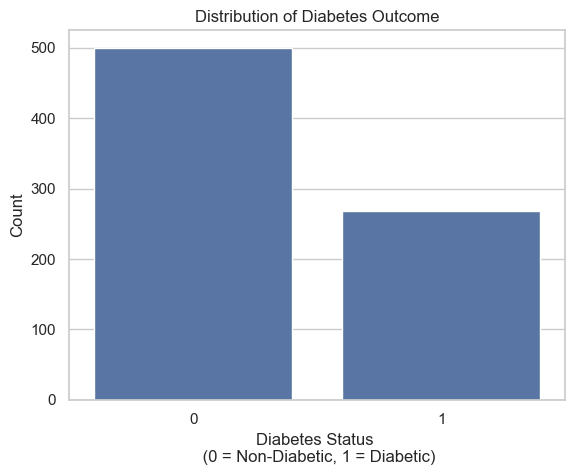

In [28]:
# Countplot
sns.countplot(x='Outcome', data=df_imputed)
plt.title("Distribution of Diabetes Outcome")
plt.xlabel("Diabetes Status \n (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Count")
plt.show()

**Interpretation**

The dataset shows a **class imbalance** in the target variable (Outcome), with more individuals labeled as non-diabetic (Outcome = 0) compared to diabetic (Outcome = 1).

#### 4.1.3 Pregnancies and Diabetes Risk
Effect of number of pregnancies on diabetes outcome.

##### 4.1.3.1 Distribution Plot (Histogram) for Pregnancies

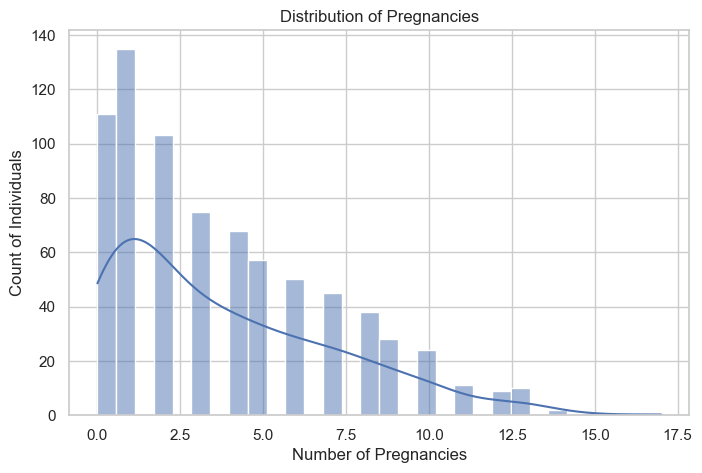

In [29]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df_imputed['Pregnancies'], kde=True, bins=30)
plt.title('Distribution of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count of Individuals')
plt.show()

**Interpretation**

This histogram on pregnancies show a right-skewed distribution, indicating most women have fewer pregnancies, with a few having many.

##### 4.1.3.2 Group Comparison Box Plot (Pregnancies vs Outcome)

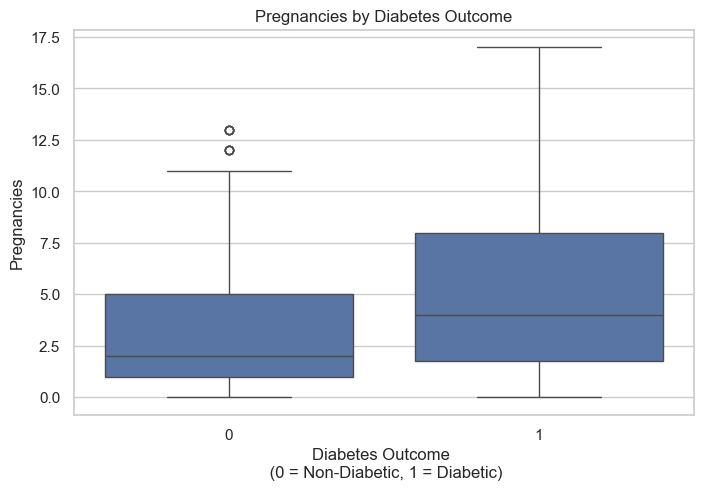

In [30]:
# Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='Pregnancies', data=df_imputed)
plt.title('Pregnancies by Diabetes Outcome')
plt.xlabel('Diabetes Outcome \n (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Pregnancies')
plt.show()

**Interpretation**

The box plot shows that individuals with diabetes tend to have a higher median number of pregnancies and a wider range of pregnancies compared to those without diabetes. The plot suggests a positive association between the number of pregnancies and diabetes, although there is variability within both groups.

#### 4.1.4 Glucose Level Distribution and Impact
Glucose levels and their relationship with diabetes.

##### 4.1.4.1 Distribution Plot (Histogram) for Glucose Levels

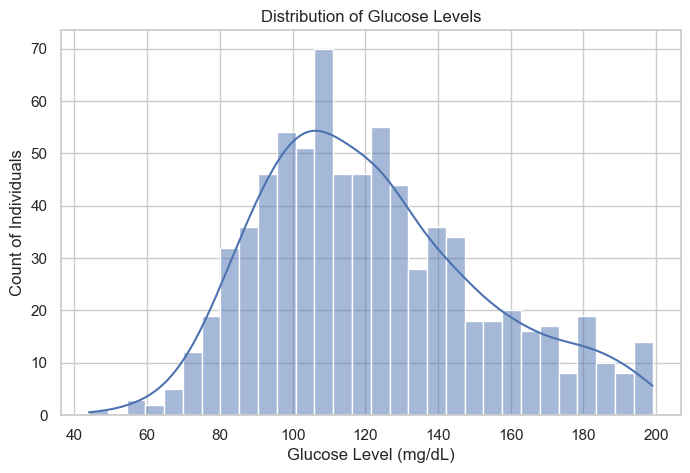

In [31]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df_imputed['Glucose'], kde=True, bins=30)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose Level (mg/dL)')
plt.ylabel('Count of Individuals')
plt.show()

**Interpretation**

The histogram shows a roughly bell-shaped distribution of glucose levels, peaking around 100-120mg/dl, indicating that most individuals have glucose levels in this range. The distribution is slightly right-skewed, suggesting a higher frequency of individuals with elevated glucose levels.

##### 4.1.4.2 Group Comparison Box Plot (Glucose vs Outcome)

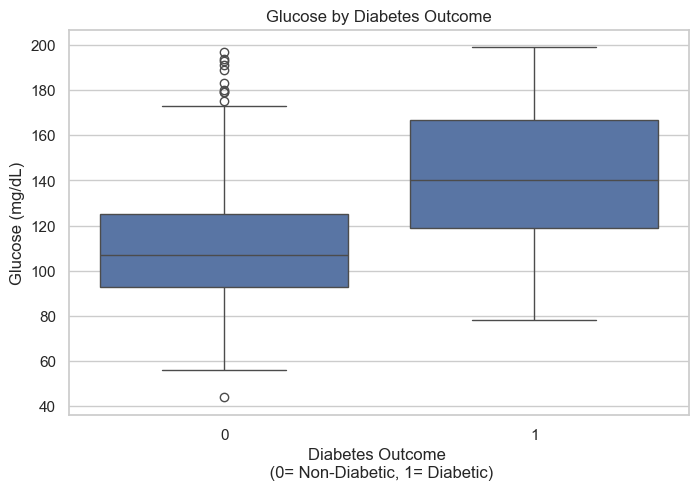

In [32]:
# Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='Glucose', data=df_imputed)
plt.title('Glucose by Diabetes Outcome')
plt.xlabel('Diabetes Outcome \n (0= Non-Diabetic, 1= Diabetic)')
plt.ylabel('Glucose (mg/dL)')
plt.show()

**Interpretation**

The boxplot reveals a clear difference in glucose levels between people with and without diabetes, with those having diabetes exhibiting higher median glucose levels (around 140mg/dl) and a greater range of values. In contrast, people without diabetes have lower median glucose levels (around 110mg/dl) and a smaller interquartile range.

#### 4.1.5 Blood Pressure and Diabetes Association
Blood pressure patterns and relationship with diabetes.

##### 4.1.5.1 Distribution Plot (Histogram) for Blood Pressure

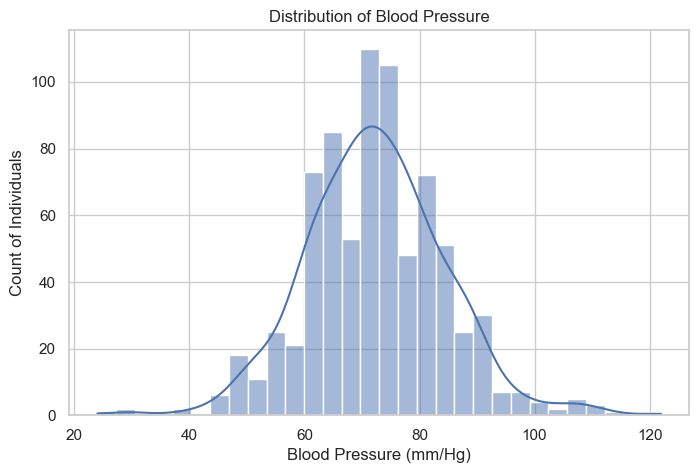

In [33]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df_imputed['BloodPressure'], kde=True, bins=30)
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure (mm/Hg)')
plt.ylabel('Count of Individuals')
plt.show()

**Interpretation**

The histogram shows a normal distribution of blood pressure readings, with the majority of values clustered around 60-80 mm/Hg and fewer readings at the extremes. The data follows a bell-shaped curve, indicating a typical Gaussian distribution of blood pressure values.

##### 4.1.5.2 Group Comparison Box Plot (Blood Pressure vs Outcome)

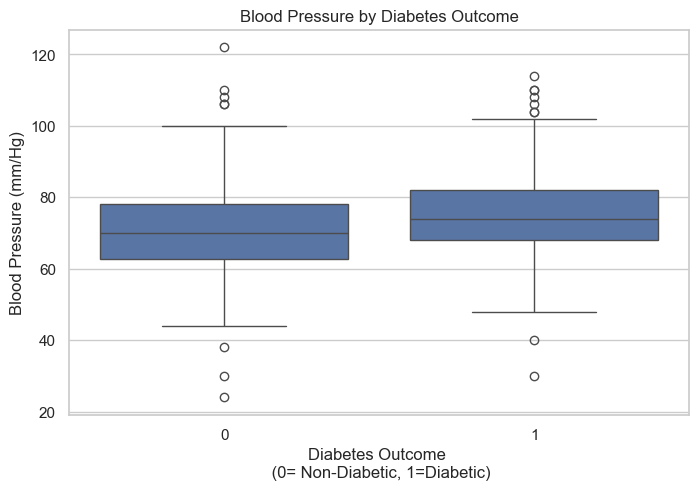

In [34]:
# Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='BloodPressure', data=df_imputed)
plt.title('Blood Pressure by Diabetes Outcome')
plt.xlabel('Diabetes Outcome \n (0= Non-Diabetic, 1=Diabetic)')
plt.ylabel('Blood Pressure (mm/Hg)')
plt.show()

**Interpretation**

The box plot reveals that median blood pressure values for individuals with and without diabetes are relatively close, with a slight difference (around 75 mmHg for diabetics and 70 mmHg for non-diabetics). The interquartile ranges overlap significantly, suggesting a nuanced relationship between diabetes and blood pressure.

#### 4.1.6 Skin Thickness and Diabetes
Skin thickness measurements in diabetic vs. non-diabetic groups.

##### 4.1.6.1 Distribution Plot (Histogram) for Skin Thickness

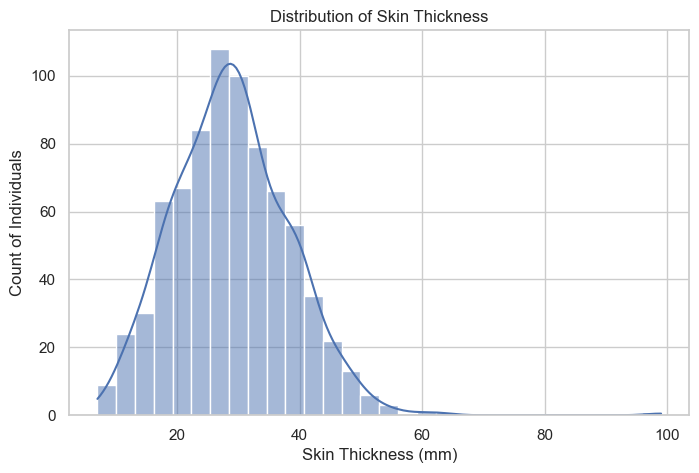

In [35]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df_imputed['SkinThickness'], kde=True, bins=30)
plt.title('Distribution of Skin Thickness')
plt.xlabel('Skin Thickness (mm)')
plt.ylabel('Count of Individuals')
plt.show()

**Interpretation**

The histogram shows a unimodal distribution of skin thickness, peaking around 30mm, with the majority of values falling between 15mm and 45mm. The distribution is right-skewed, indicating a higher frequency of individuals with lower skin thicknesses and fewer individuals with higher skin thicknesses.

##### 4.1.6.2 Group Comparison Box Plot (Skin Thickness vs Outcome)

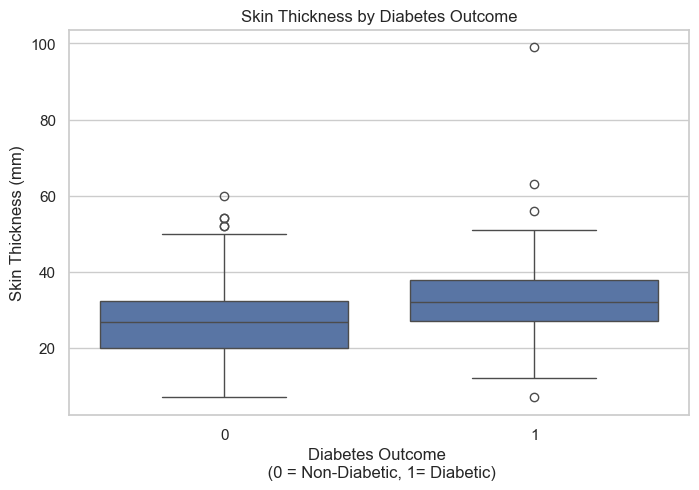

In [36]:
# Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='SkinThickness', data=df_imputed)
plt.title('Skin Thickness by Diabetes Outcome')
plt.xlabel('Diabetes Outcome \n (0 = Non-Diabetic, 1= Diabetic)')
plt.ylabel('Skin Thickness (mm)')
plt.show()

**Interpretation**

The box plot shows that, on average, individuals with diabetes may have slightly thicker skin than those without diabetes. The difference in median values is relatively modest, suggesting weaker predictive power of skin thickness. However, there is variability within both groups, and the presence of outliers indicates that some individuals have skin thickness measurements that deviate significantly from the typical range.


#### 4.1.7 Insulin Levels and Impact on Diabetes

##### 4.1.7.1 Distribution Plot (Histogram) for Insulin Levels

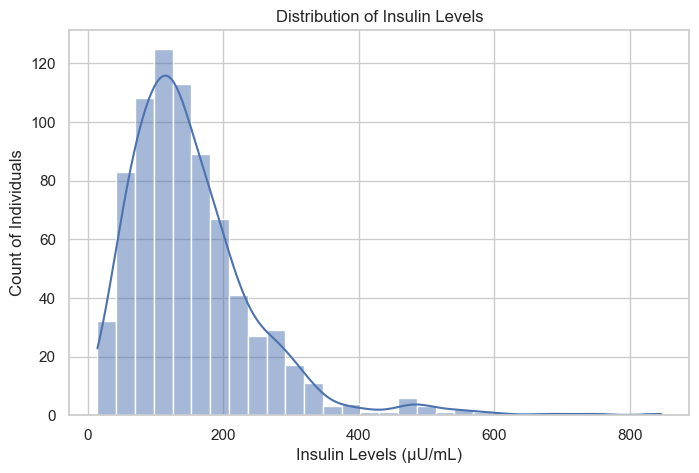

In [37]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df_imputed['Insulin'], kde=True, bins=30)
plt.title('Distribution of Insulin Levels')
plt.xlabel('Insulin Levels (µU/mL)')
plt.ylabel('Count of Individuals')
plt.show()

**Interpretation**

The histogram shows the distribution of insulin levels, with most individuals having levels around 100-150 µU/mL. The distribution is right-skewed, indicating a few individuals with significantly higher insulin levels, up to approximately 800 µU/mL.

##### 4.1.7.2 Group Comparison Box Plot (Insulin vs Outcome)

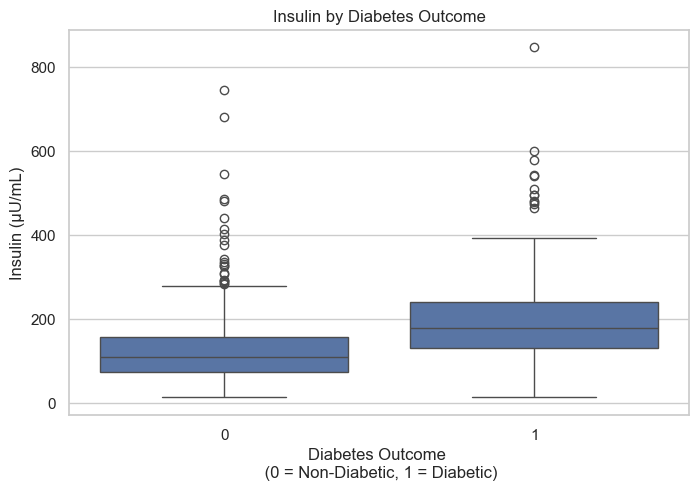

In [38]:
# Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='Insulin', data=df_imputed)
plt.title('Insulin by Diabetes Outcome')
plt.xlabel('Diabetes Outcome \n (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Insulin (µU/mL)')
plt.show()

**Interpretation**

The box plot analysis reveals that individuals with diabetes tend to have higher median insulin levels and a wider range of insulin levels compared to non-diabetic individuals. Both groups have outliers with significantly higher insulin levels, indicating variability within each group.

#### 4.1.8 Body Mass Index (BMI) and Diabetes
BMI’s influence on diabetes risk.

##### 4.1.8.1 Distribution Plot (Histogram) for BMI

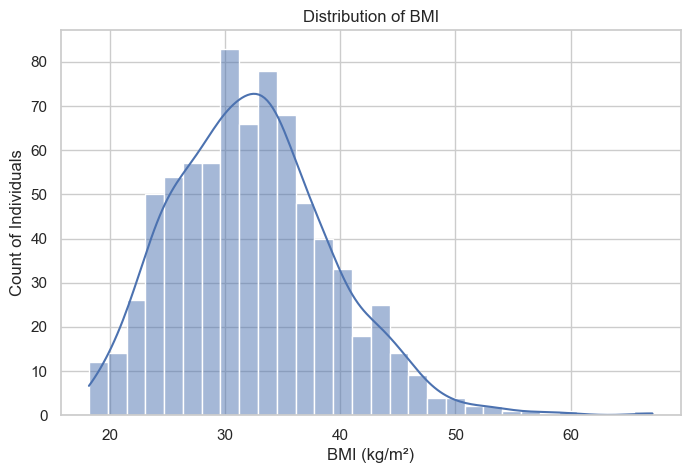

In [39]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df_imputed['BMI'], kde=True, bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI (kg/m²)')
plt.ylabel('Count of Individuals')
plt.show()

**Interpretation**

The BMI distribution is roughly normal with a slight right skew, peaking around 32kg/m². Most individuals have BMIs between 25kg/m² and 40kg/m², with a tail of higher BMIs indicating some individuals with significantly elevated BMIs.

##### 4.1.8.2 Group Comparison Box Plot (BMI vs Outcome)

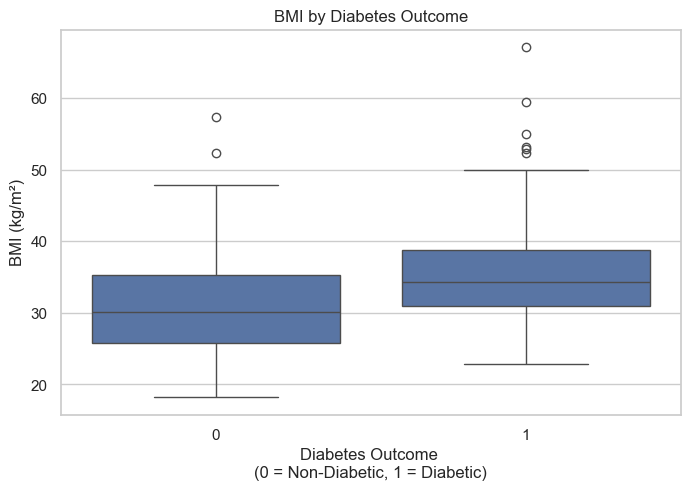

In [40]:
# Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='BMI', data=df_imputed)
plt.title('BMI by Diabetes Outcome')
plt.xlabel('Diabetes Outcome \n(0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('BMI (kg/m²)')
plt.show()

**Interpretation**

The boxplot analysis indicates a correlation between higher BMI and diabetes, with individuals with diabetes having a higher median BMI and a wider range of BMI values. However, the presence of outliers in both groups suggests that BMI is not the sole determining factor for diabetes.

#### 4.1.9 Diabetes Pedigree Function (Genetic Risk)
Genetic predisposition to diabetes through pedigree function.

##### 4.1.9.1 Distribution Plot (Histogram) for Diabetes Pedigree Function

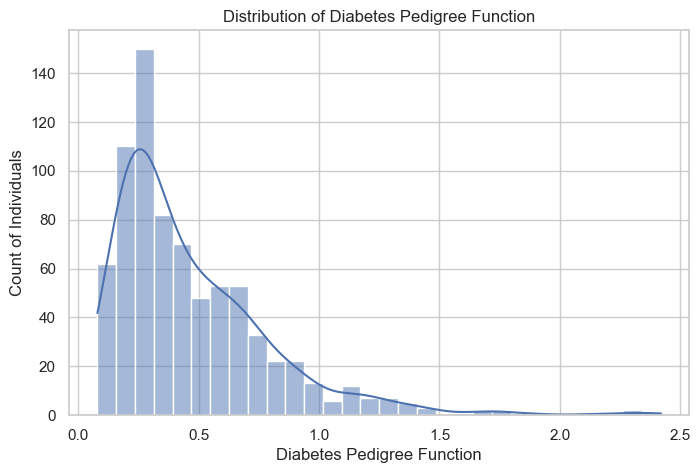

In [41]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df_imputed['DiabetesPedigreeFunction'], kde=True, bins=30)
plt.title('Distribution of Diabetes Pedigree Function')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Count of Individuals')
plt.show()

**Interpretation**

The histogram shows a right-skewed distribution of Diabetes Pedigree Function values, peaking around 0.2 and decreasing as values increase, with a tail extending towards higher values up to 2.5. This suggests that most individuals have lower Diabetes Pedigree Function values, while a few have significantly higher values.

##### 4.1.9.2 Group Comparison Box Plot (Diabetes Pedigree Function vs Outcome)

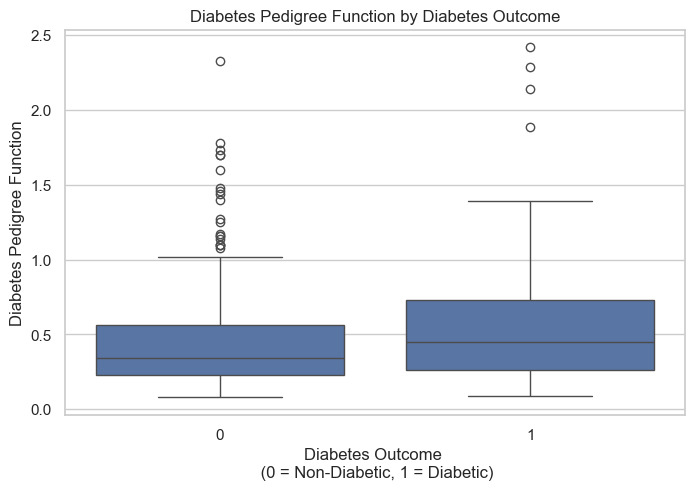

In [42]:
# Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df_imputed)
plt.title('Diabetes Pedigree Function by Diabetes Outcome')
plt.xlabel('Diabetes Outcome \n (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Diabetes Pedigree Function')
plt.show()

**Interpretation**

The boxplot analysis reveals that individuals with diabetes tend to have a higher median Diabetes Pedigree Function (DPF) value and a wider range of DPF values compared to those without diabetes. The data suggests a positive association between DPF and diabetes likelihood, indicating that individuals with a stronger genetic predisposition are more likely to develop the disease.

#### 4.1.10 Age Distribution and Diabetes Prevalence
Age-related trends in diabetes occurrence.

##### 4.1.10.1 Distribution Plot (Histogram) for Age

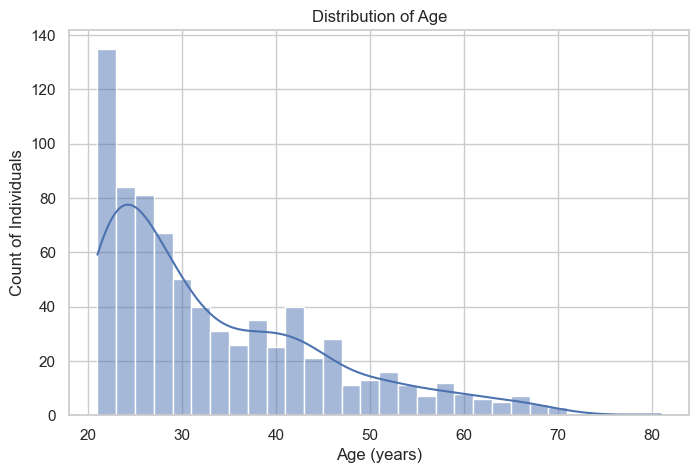

In [43]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df_imputed['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Count of Individuals')
plt.show()

**Interpretation**

The histogram shows a right-skewed distribution of age, with most individuals clustered between 20-30 years old. The count decreases as age increases, indicating fewer individuals in older age groups, with a peak around 20-25 years old.

##### 4.1.10.2 Group Comparison Box Plot (Age vs Outcome)

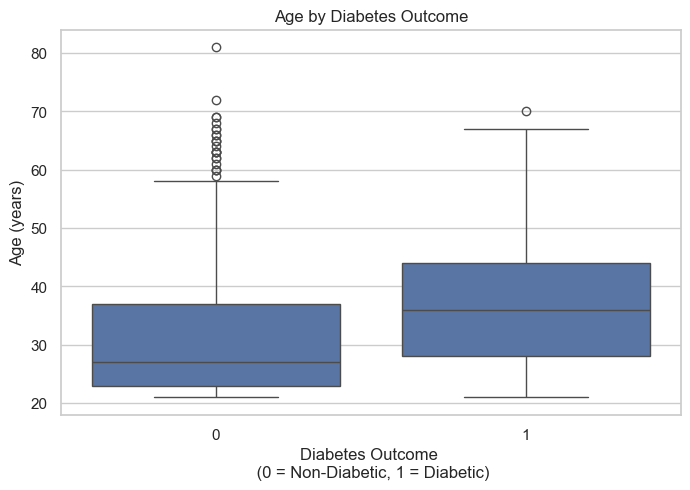

In [44]:
# Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='Age', data=df_imputed)
plt.title('Age by Diabetes Outcome')
plt.xlabel('Diabetes Outcome \n (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Age (years)')
plt.show()

**Interpretation**

The box plot analysis shows that individuals with diabetes tend to be older, with a higher median age and a wider age range compared to those without diabetes. Both groups have outliers, but the data suggests a general trend of older age being associated with diabetes.

#### 4.1.11 Correlation Matrix and Multicollinearity Check

##### 4.1.11.1 Correlation Matrix demonstrated using Heatmap

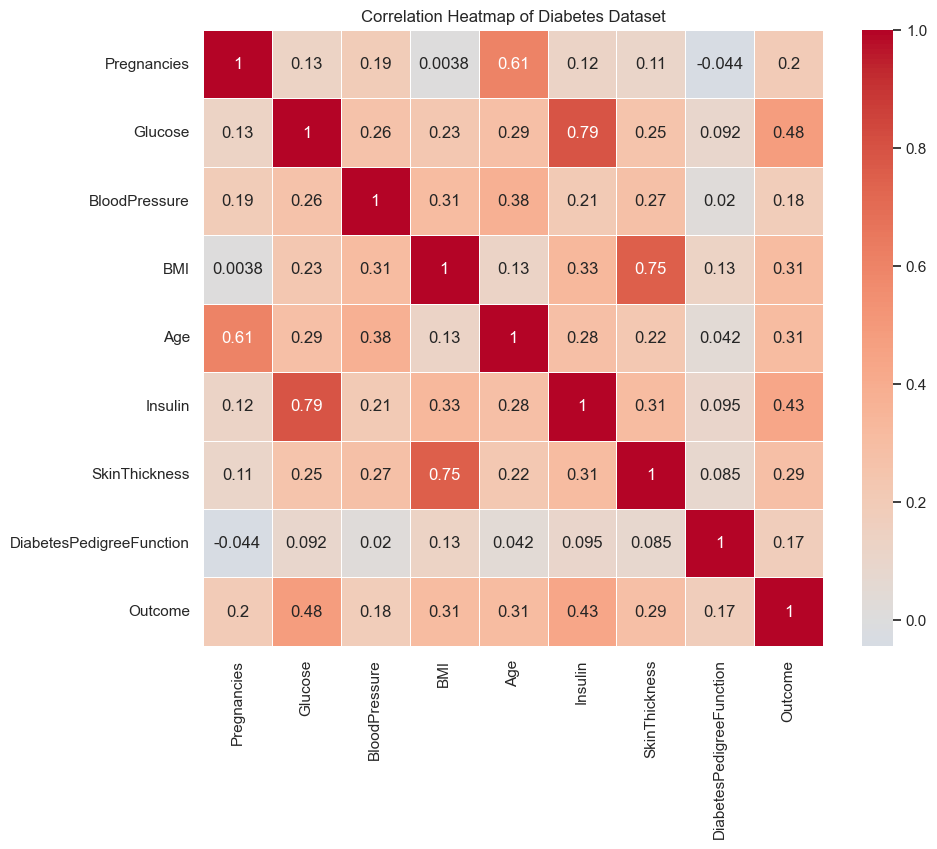

In [45]:
# Select numeric columns
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age',
           'Insulin', 'SkinThickness', 'DiabetesPedigreeFunction', 'Outcome']

# Compute Spearman correlation matrix
corr_matrix = df_imputed[columns].corr(method='spearman')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()


**Intepretation**

The strongest positive correlation is between glucose and insulin levels.

Glucose has the strongest positive correlation with Outcome.

BMI and SkinThickness correlation indicate a strong positive linear relationship.

Pregnancies and Age correlation indicates a moderate to strong postive linear relationship.

DPF may show weak-to-moderate correlation but still contributes.

##### 4.1.11.2 Multicollinearity Check using Variance Inflation Factor (VIF)
VIF does quantitative measure of multicollinearity

In [46]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age', 'Insulin', 'SkinThickness', 'DiabetesPedigreeFunction']

X = df_imputed[features]
X_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]

vif_data

,Feature,VIF
0,Pregnancies,1.435900
1,Glucose,2.070584
2,BloodPressure,1.269819
3,BMI,2.210755
4,Age,1.649578
5,Insulin,2.035444
6,SkinThickness,2.078679
7,DiabetesPedigreeFunction,1.045059


**Interpretation**

All VIF values are well below 5, which is commonly used as a threshold for concern.

This means multicollinearity is not a concern in this dataset.

All features can be safely kept in the classification model to be built without worrying about multicollinearity inflating variances.

#### 4.1.12 Key Findings from EDA

##### 1. Glucose
Patients with diabetes have **significantly higher glucose levels**, as shown by histograms and boxplots.
Glucose also shows one of the **strongest positive correlations with the Outcome variable**. Higher glucose levels are **strongly associated** with diabetic cases. It is a **key predictor of diabetes risk** and should be prioritized in model development.
##### 2. BMI (Body Mass Index)
Diabetic patients tend to have a **higher BMI distribution** compared to non-diabetics. Boxplots indicate a clear upward shift in BMI for the diabetic group. This supports the established medical link between **obesity and diabetes**. Higher BMI correlates with increased diabetes risk, as obesity is a **known contributor** to insulin resistance.
##### 3. Insulin
The insulin levels of diabetics are **more varied and generally higher**.
Some imputed values exist, but the trend remains visible.
Though slightly less correlated to the outcome variable than glucose or BMI, insulin still adds **predictive value**.
##### 4. Age
The average age of diabetic patients is higher, and age has a **moderate correlation** with the diabetes outcome.
This implies that **increasing age is associated with increased risk**. Older age groups show higher diabetes incidence, likely due to cumulative metabolic stress and declining insulin sensitivity.
##### 5. Diabetes Pedigree Function (DPF)
Diabetics exhibit **higher DPF values**.
While its correlation with Outcome is weaker than glucose or BMI, it still contributes to **risk profiling based on family history**, highlighting the role of heredity.
##### 6. Pregnancies
The variable is skewed, with a long tail, but still shows potential as a **contributing feature**, especially in this female-only dataset. Higher pregnancy counts correlate with increased diabetes risk, potentially due to gestational diabetes history or metabolic changes post-pregnancy.
##### 7. Skin Thickness & Blood Pressure
These features showed **less distinct separation** between diabetic and non-diabetic groups in boxplots.
They may carry **limited individual predictive power**, but could still add value in combination with stronger predictors.
**Higher skinfold thickness** (a proxy for body fat) correlates with **insulin resistance** and **diabetes risk**.
##### 8. Correlation of Insulin and Glucose
There is a **strong positive correlation** between glucose and insulin levels. Correlation heatmap shows that as glucose levels increase, insulin levels tend to increase as well. This relationship is expected, as insulin is the hormone responsible for lowering blood glucose, and higher glucose often triggers higher insulin production (unless insulin resistance or deficiency is present).
##### 9. Correlation between BMI and Skin Thickness
There is a **strong positive linear relationship** between BMI and skin thickness. This suggests that individuals with **higher BMI** tend to have **thicker skinfolds**, which aligns with the fact that both are **indicators of body fat**. Both BMI and SkinThickness are **biologically relevant** to **diabetes risk** (they relate to body fat and insulin resistance), so including them can improve model accuracy.
##### 10. Correlation between Pregnancies and Age
There is a **moderate to strong positive linear relationship** between age and the number of pregnancies. Older individuals tend to report more pregnancies, which is logically expected due to increased reproductive time. Both features are **logically linked to diabetes risk** — age is a major risk factor, and number of pregnancies (especially gestational diabetes) is also relevant.
##### 11. Multicollinearity (VIF Analysis)
All features had **VIF < 5**, indicating **no problematic multicollinearity**.
This means the features are not redundant and can be **safely included together** in the model.
##### 12. Outcome
There is **class imbalance**. The dataset is skewed: 500 non-diabetic (Class 0) vs. 268 diabetic (Class 1) cases. This imbalance may affect model accuracy if unaddressed.

### 4.2 Descriptive Statistics <a id="42-descriptive-statistics"></a>

#### 4.2.1 Overall Descriptive Analysis

In [47]:
features = ["Pregnancies", "BloodPressure", "SkinThickness", 
            "Glucose", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Get the descriptive stats
combined_desc = df_imputed[features].describe().round(2).T

# Reset the index to turn the index into a column
combined_desc = combined_desc.reset_index()

# Rename the new column to 'Feature'
combined_desc.columns.values[0] = 'Feature'  

# Display the table
print("\nOverall Descriptive Analysis:")
combined_desc


Overall Descriptive Analysis:


,Feature,count,mean,std,min,25%,50%,75%,max
0,Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
1,BloodPressure,768.0,72.36,12.15,24.00,64.00,72.00,80.00,122.00
2,SkinThickness,768.0,28.93,9.52,7.00,22.22,28.44,35.00,99.00
3,Glucose,768.0,121.64,30.47,44.00,99.00,117.00,140.25,199.00
4,Insulin,768.0,152.68,97.28,14.00,89.99,130.20,190.00,846.00
5,BMI,768.0,32.44,6.88,18.20,27.50,32.00,36.60,67.10
6,DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
7,Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00


#### 4.2.2 Descriptive Analysis based on Diabetic Status

In [48]:
# Define the features to analyze
features = ["Pregnancies", "BloodPressure", "SkinThickness", 
            "Glucose", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Compute grouped descriptive statistics by Outcome
grouped_desc = df_imputed.groupby("Outcome")[features].describe().round(2)

# For Non-Diabetics (Outcome = 0)
non_diabetic_desc = grouped_desc.loc[0].T.reset_index()
non_diabetic_desc.columns = ['Feature', 'Statistic', 'Value']
non_diabetic_table = non_diabetic_desc.pivot(index='Feature', columns='Statistic', values='Value').reset_index()
non_diabetic_table = non_diabetic_table.round(2)

# For Diabetics (Outcome = 1)
diabetic_desc = grouped_desc.loc[1].T.reset_index()
diabetic_desc.columns = ['Feature', 'Statistic', 'Value']
diabetic_table = diabetic_desc.pivot(index='Feature', columns='Statistic', values='Value').reset_index()
diabetic_table = diabetic_table.round(2)

In [49]:
# Print table for Diabetics
print("\nDescriptive Statistics for Diabetics:")
diabetic_table


Descriptive Statistics for Diabetics:


Statistic,Feature,25%,50%,75%,count,max,mean,min,std
0,Age,28.00,36.00,44.00,268.0,70.00,37.07,21.00,10.97
1,BMI,30.90,34.30,38.78,268.0,67.10,35.39,22.90,6.59
2,BloodPressure,68.00,74.00,82.00,268.0,114.00,75.27,30.00,11.98
3,DiabetesPedigreeFunction,0.26,0.45,0.73,268.0,2.42,0.55,0.09,0.37
4,Glucose,119.00,140.00,167.00,268.0,199.00,142.24,78.00,29.50
5,Insulin,130.98,178.11,240.16,268.0,846.00,200.49,14.00,103.19
6,Pregnancies,1.75,4.00,8.00,268.0,17.00,4.87,0.00,3.74
7,SkinThickness,27.00,32.00,37.95,268.0,99.00,32.55,7.00,9.17


In [50]:
# Print table for Diabetics
print("Descriptive Statistics for Non-Diabetics:")
non_diabetic_table

Descriptive Statistics for Non-Diabetics:


Statistic,Feature,25%,50%,75%,count,max,mean,min,std
0,Age,23.00,27.00,37.00,500.0,81.00,31.19,21.00,11.67
1,BMI,25.75,30.10,35.30,500.0,57.30,30.85,18.20,6.50
2,BloodPressure,62.64,70.00,78.00,500.0,122.00,70.80,24.00,11.96
3,DiabetesPedigreeFunction,0.23,0.34,0.56,500.0,2.33,0.43,0.08,0.30
4,Glucose,93.00,107.00,125.00,500.0,197.00,110.60,44.00,24.72
5,Insulin,73.83,110.00,156.64,500.0,744.00,127.06,14.00,83.44
6,Pregnancies,1.00,2.00,5.00,500.0,13.00,3.30,0.00,3.02
7,SkinThickness,20.00,26.88,32.29,500.0,60.00,26.98,7.00,9.14


#### 4.2.3 Save Descriptive Statistics into Excel Workbook

In [51]:
with pd.ExcelWriter("diabetes_descriptive_stats.xlsx") as writer:
    combined_desc.to_excel(writer, sheet_name="Overall Descriptive Analysis", index=False)
    non_diabetic_table.to_excel(writer, sheet_name="Non-Diabetics", index=False)
    diabetic_table.to_excel(writer, sheet_name="Diabetics", index=False)

print("Dataset saved as 'diabetes_descriptive_stats.xlsx'")

Dataset saved as 'diabetes_descriptive_stats.xlsx'


#### 4.2.4 Key Findings from Descriptive Statistics

##### 1. Glucose Levels
Diabetic patients have a **significantly higher mean glucose** (approx. 141 mg/dL) than non-diabetics (approx. 110 mg/dL).
This confirms that **glucose is a strong predictor** of diabetes.
##### 2. Insulin Levels
Though there are missing/imputed values, the **mean insulin** level is higher in diabetics.
There's also **greater variance** in insulin values among diabetics, suggesting that abnormal insulin response is a factor.
##### 3. BMI (Body Mass Index)
Diabetics tend to have **higher average BMI** than non-diabetics.
This supports the known link between obesity and diabetes risk.
##### 4. Age
The average age of diabetics is **significantly higher** than non-diabetics.
This indicates increasing age is associated with greater diabetes risk.
##### 5. Diabetes Pedigree Function (DPF)
Diabetics show a **higher average DPF**, suggesting **family history is also a contributing factor**.
##### 6. Other Features (like Pregnancies, Blood Pressure, Skin Thickness)
Some differences exist but are **less distinct** than glucose or BMI.
They may contribute moderately to prediction but likely **less influential individually**.

### 4.3 Inferential Statistics <a id="43-inferential-statistics"></a>

#### 4.3.1 Grouping Pregnancy and Age columns

In [52]:
# Group Age into categories
def age_group(age):
    if age < 30:
        return "Young"
    elif 30 <= age <= 50:
        return "Middle-aged"
    else:
        return "Old"
df_imputed['AgeGroup'] = df_imputed['Age'].apply(age_group)

# Group Pregnancies into categories
def pregnancy_group(preg):
    if preg == 0:
        return "None"
    elif preg == 1:
        return "Low"
    elif 2<= preg <= 4:
        return "Medium"
    else:
        return "High"

df_imputed['PregnancyGroup'] = df_imputed['Pregnancies'].apply(pregnancy_group)

df_imputed[['Pregnancies', 'PregnancyGroup', 'Age', 'AgeGroup']].head()

,Pregnancies,PregnancyGroup,Age,AgeGroup
0,6.0,High,50.0,Middle-aged
1,1.0,Low,31.0,Middle-aged
2,8.0,High,32.0,Middle-aged
3,1.0,Low,21.0,Young
4,0.0,None,33.0,Middle-aged


#### 4.3.2 Hypothesis Testing

##### 4.3.2.1 Mean Glucose (Diabetic vs Non-Diabetic)

The goal is to compare the glucose mean across the 2 groups (diabetic and non-diabetic) and see if there's a difference

null hypothesis: There is no significant difference in the glucose mean across the 2 groups.

alternative hypothesis: There is a significant difference in the glucose mean across the 2 groups

Decision rule: Reject null hypothesis if p-value is lesser than the significant level.

In [53]:
# At 95% level of significance
glucose1 = df_imputed[df_imputed['Outcome'] == 1]['Glucose']
glucose2 = df_imputed[df_imputed['Outcome'] == 0]['Glucose']

# Using t-test because it's between 2 groups
t_stat_glucose, p_val_glucose = ttest_ind(glucose1, glucose2)
print(f"The T-test result for glucose includes: t-statistic= {t_stat_glucose} and the p-value= {p_val_glucose}.")

if p_val_glucose < 0.05: # level of significance
    print("Reject the null hypothesis. \nThere is a significant difference in the glucose mean across the 2 groups")
else:
    print("Fail to reject the null hypothesis. \nThere is no significant difference in the glucose mean across the 2 groups")

The T-test result for glucose includes: t-statistic= 15.7753453996013 and the p-value= 9.311170769268823e-49.
Reject the null hypothesis. 
There is a significant difference in the glucose mean across the 2 groups


##### 4.3.2.2 Mean Insulin (Diabetic vs Non-Diabetic)


The goal is to compare the insulin mean across the 2 groups (diabetic and non-diabetic) and see if there's a difference

null hypothesis: There is no significant difference in the insulin mean across the 2 groups.

alternative hypothesis: There is a significant difference in the insulin mean across the 2 groups

Decision rule: Reject null hypothesis if p-value is lesser than the significant level.

In [54]:
# At 95% level of significance
insulin1 = df_imputed[df_imputed['Outcome'] == 1]['Insulin']
insulin2 = df_imputed[df_imputed['Outcome'] == 0]['Insulin']

# Using t-test because it's between 2 groups
t_stat_insulin, p_val_insulin = ttest_ind(insulin1, insulin2)
print(f"The T-test result for insulin includes: t-statistic= {t_stat_insulin} and the p-value= {p_val_insulin}.")

if p_val_insulin < 0.05: # level of significance
    print("Reject the null hypothesis. \nThere is a significant difference in the insulin mean across the 2 groups")
else:
    print("Fail to reject the null hypothesis. \nThere is no significant difference in the insulin mean across the 2 groups")

The T-test result for insulin includes: t-statistic= 10.680239235848315 and the p-value= 6.451165748791912e-25.
Reject the null hypothesis. 
There is a significant difference in the insulin mean across the 2 groups


##### 4.3.2.3 Mean BloodPressure (Diabetic vs Non-Diabetic)

The goal is to compare the bloodpressure mean across the 2 groups (diabetic and non-diabetic) and see if there's a difference

null hypothesis: There is no significant difference in the bloodpressure mean across the 2 groups.

alternative hypothesis: There is a significant difference in the bloodpressure mean across the 2 groups

Decision rule: Reject null hypothesis if p-value is lesser than the significant level.

In [55]:
# At 95% level of significance
bp1 = df_imputed[df_imputed['Outcome'] == 1]['BloodPressure']
bp2 = df_imputed[df_imputed['Outcome'] == 0]['BloodPressure']

# Using t-test because it's between 2 groups
t_stat_bp, p_val_bp = ttest_ind(bp1, bp2)
print(f"The T-test result for bloodpressure includes: t-statistic= {t_stat_bp} and the p-value= {p_val_bp}.")

if p_val_bp < 0.05: # level of significance
    print("Reject the null hypothesis. \nThere is a significant difference in the bloodpressure mean across the 2 groups")
else:
    print("Fail to reject the null hypothesis. \nThere is no significant difference in the bloodpressure mean across the 2 groups")

The T-test result for bloodpressure includes: t-statistic= 4.924388666257176 and the p-value= 1.0370248194518666e-06.
Reject the null hypothesis. 
There is a significant difference in the bloodpressure mean across the 2 groups


##### 4.3.2.4 Mean DiabetesPedigreeFunction (Diabetic vs Non-Diabetic)

The goal is to compare the DiabetesPedigreeFunction mean across the 2 groups (diabetic and non-diabetic) and see if there's a difference

null hypothesis: There is no significant difference in the DiabetesPedigreeFunction mean across the 2 groups.

alternative hypothesis: There is a significant difference in the DiabetesPedigreeFunction mean across the 2 groups

Decision rule: Reject null hypothesis if p-value is lesser than the significant level.

In [56]:
# At 95% level of significance
DPF1 = df_imputed[df_imputed['Outcome'] == 1]['DiabetesPedigreeFunction']
DPF2 = df_imputed[df_imputed['Outcome'] == 0]['DiabetesPedigreeFunction']

# Using t-test because it's between 2 groups
t_stat_DPF, p_val_DPF = ttest_ind(DPF1, DPF2)
print(f"The T-test result for DiabetesPedigreeFunction includes: t-statistic= {t_stat_DPF} and the p-value= {p_val_DPF}.")

if p_val_DPF < 0.05: # level of significance
    print("Reject the null hypothesis. \nThere is a significant difference in the DiabetesPedigreeFunction mean across the 2 groups")
else:
    print("Fail to reject the null hypothesis. \nThere is no significant difference in the DiabetesPedigreeFunction mean across the 2 groups")

The T-test result for DiabetesPedigreeFunction includes: t-statistic= 4.8697072359831095 and the p-value= 1.3580536117813747e-06.
Reject the null hypothesis. 
There is a significant difference in the DiabetesPedigreeFunction mean across the 2 groups


##### 4.3.2.5 Mean BMI across age groups

The goal is to see if the BMI mean across the different age groups(Youth-Old) differ.

null hypothesis: BMI mean is equal across age groups

alternative hypothesis: At least one age group has a BMI mean different from the others.

Decision rule: Reject null hypothesis if p-value is lesser than the significant level.

In [57]:
# At 95% significant level
BMI_young = df_imputed[df_imputed['AgeGroup'] == 'Young']['BMI']
BMI_middle_aged = df_imputed[df_imputed['AgeGroup'] == 'Middle-aged']['BMI']
BMI_old = df_imputed[df_imputed['AgeGroup'] == 'Old']['BMI']

# Using ANOVA because the groups are more than 2
f_stat_BMI, p_val_BMI = f_oneway(BMI_young, BMI_middle_aged, BMI_old)
print(f"ANOVA result for BMI: F-statistic= {f_stat_BMI} and p-value= {p_val_BMI}")

if p_val_BMI < 0.05: # level of significance
    print("Reject the null hypothesis. \nAt least one age group BMI mean differs from the others")
else:
    print("Fail to reject the null hypothesis. \nBMI mean is not equal across the age groups")

ANOVA result for BMI: F-statistic= 5.497811874361184 and p-value= 0.004259193665760479
Reject the null hypothesis. 
At least one age group BMI mean differs from the others


##### 4.3.2.6 Mean BloodPressure across age groups

The goal is to see if the mean bloodpressure across the different age groups(Youth-Old) are differ.

null hypothesis: Bloodpressure mean is equal across age groups

alternative hypothesis: At least one age group has a BloodPressure mean different from the others.

Decision rule: Reject null hypothesis if p-value is lesser than the significant level.

In [58]:
# At 95% significant level
bp_young = df_imputed[df_imputed['AgeGroup'] == 'Young']['BloodPressure']
bp_middle_aged = df_imputed[df_imputed['AgeGroup'] == 'Middle-aged']['BloodPressure']
bp_old = df_imputed[df_imputed['AgeGroup'] == 'Old']['BloodPressure']

# Using ANOVA because the groups are more than 2
f_stat_BP, p_val_BP = f_oneway(bp_young, bp_middle_aged, bp_old)
print(f"ANOVA result for BloodPressure: F-statistic= {f_stat_BP} and p-value= {p_val_BP}")

if p_val_BP < 0.05: # level of significance
    print("Reject the null hypothesis. \nAt least one age group BloodPressure mean differs from the others")
else:
    print("Fail to reject the null hypothesis. \nBloodPressure mean is not equal across the age groups")

ANOVA result for BloodPressure: F-statistic= 42.583462404422214 and p-value= 2.9183711799708068e-18
Reject the null hypothesis. 
At least one age group BloodPressure mean differs from the others


##### 4.3.2.7 Mean SkinThickness across pregnancy groups

The goal is to see if the mean skinthickness across the different pregnancy groups(none-high) are equal.

null hypothesis: Skinthickness mean is equal across pregnancy groups

alternative hypothesis: At least one pregnancy group has a SkinThickness mean different from the others.

Decision rule: Reject null hypothesis if p-value is lesser than the significant level.

In [59]:
# At 95% significant level
skinthickness_none = df_imputed[df_imputed['PregnancyGroup'] == 'None']['SkinThickness']
skinthickness_low = df_imputed[df_imputed['PregnancyGroup'] == 'Low']['SkinThickness']
skinthickness_medium = df_imputed[df_imputed['PregnancyGroup'] == 'Medium']['SkinThickness']
skinthickness_high = df_imputed[df_imputed['PregnancyGroup'] == 'High']['SkinThickness']

# Using ANOVA because the groups are more than 2
f_stat_skinThi, p_val_skinThi = f_oneway(skinthickness_none, skinthickness_low, skinthickness_medium, skinthickness_high)
print(f"ANOVA result for SkinThickness: F-statistic= {f_stat_skinThi} and p-value= {p_val_skinThi}")

if p_val_skinThi < 0.05: # level of significance
    print("Reject the null hypothesis. \nAt least one pregnancy group SkinThickness mean differs from the others")
else:
    print("Fail to reject the null hypothesis. \nSkinThickness mean is not equal across the pregnancy groups")

ANOVA result for SkinThickness: F-statistic= 8.269489406245441 and p-value= 2.0312583168446416e-05
Reject the null hypothesis. 
At least one pregnancy group SkinThickness mean differs from the others


##### 4.3.2.8 Mean Glucose across pregnancy groups

The goal is to see if the mean glucose across the different pregnancy groups(none-high) are equal.

null hypothesis: Glucose mean is equal across pregnancy groups

alternative hypothesis: At least one pregnancy group has a Glucose mean different from the others.

Decision rule: Reject null hypothesis if p-value is lesser than the significant level.

In [60]:
# At 95% significant level
glucose_none = df_imputed[df_imputed['PregnancyGroup'] == 'None']['Glucose']
glucose_low = df_imputed[df_imputed['PregnancyGroup'] == 'Low']['Glucose']
glucose_medium = df_imputed[df_imputed['PregnancyGroup'] == 'Medium']['Glucose']
glucose_high = df_imputed[df_imputed['PregnancyGroup'] == 'High']['Glucose']

# Using ANOVA because the groups are more than 2
f_stat_gluc, p_val_gluc = f_oneway(glucose_none, glucose_low, glucose_medium, glucose_high)
print(f"ANOVA result for Glucose: F-statistic= {f_stat_gluc} and p-value= {p_val_gluc}")

if p_val_gluc < 0.05: # level of significance
    print("Reject the null hypothesis. \nAt least one pregnancy group Glucose mean differs from the others")
else:
    print("Fail to reject the null hypothesis. \nGlucose mean is not equal across the pregnancy groups")

ANOVA result for Glucose: F-statistic= 5.897417839872992 and p-value= 0.0005571319906963779
Reject the null hypothesis. 
At least one pregnancy group Glucose mean differs from the others


##### 4.3.2.9 Mean BloodPressure across pregnancy groups

The goal is to see if the mean bloodpressure across the different pregnancy groups(none-high) are equal.

null hypothesis: BloodPressure mean is equal across pregnancy groups

alternative hypothesis: At least one pregnancy group has a BloodPressure mean different from the others.

Decision rule: Reject null hypothesis if p-value is lesser than the significant level.

In [61]:
# At 95% significant level
BP_none = df_imputed[df_imputed['PregnancyGroup'] == 'None']['BloodPressure']
BP_low = df_imputed[df_imputed['PregnancyGroup'] == 'Low']['BloodPressure']
BP_medium = df_imputed[df_imputed['PregnancyGroup'] == 'Medium']['BloodPressure']
BP_high = df_imputed[df_imputed['PregnancyGroup'] == 'High']['BloodPressure']

# Using ANOVA because the groups are more than 2
f_stat_bloodP, p_val_bloodP = f_oneway(BP_none, BP_low, BP_medium, BP_high)
print(f"ANOVA result for BloodPressure: F-statistic= {f_stat_bloodP} and p-value= {p_val_bloodP}")

if p_val_gluc < 0.05: # level of significance
    print("Reject the null hypothesis. \nAt least one pregnancy group BloodPressure mean differs from the others")
else:
    print("Fail to reject the null hypothesis. \nBloodPressure mean is not equal across the pregnancy groups")

ANOVA result for BloodPressure: F-statistic= 18.57829091214917 and p-value= 1.219362867332646e-11
Reject the null hypothesis. 
At least one pregnancy group BloodPressure mean differs from the others


#### 4.3.3 Test of Independence

##### 4.3.3.1 AgeGroup and Outcome

The goal is to test if the 2 categorical variables are independent.

null hypothesis: AgeGroup and Outcome are independent

alternative hypothesis: AgeGroup and Outcome are dependent

Decision rule: Reject null hypothesis if p-value is lesser than the significant level.

In [62]:
# Cross-tab for AgeGroup vs Outcome
contingency_ageGroup = pd.crosstab(df_imputed['AgeGroup'], df_imputed['Outcome'])

# At 95% level of confidence
chi2_age, p_age, dof_age, expected_age = chi2_contingency(contingency_ageGroup)
print("Chi-square test result:", chi2_age, p_age)

if p_age < 0.05: # level of significance
    print("Reject the null hypothesis. \nAgeGroup and Outcome are dependent")
else:
    print("Fail to reject the null hypothesis. \nAgeGroup and Outcome are independent")

Chi-square test result: 67.67732168274529 2.0139854171655205e-15
Reject the null hypothesis. 
AgeGroup and Outcome are dependent


##### 4.3.3.2 PregnancyGroup and Outcome

The goal is to test if the 2 categorical variables are independent.

null hypothesis: PregnancyGroup and Outcome are independent

alternative hypothesis: PregnancyGroup and Outcome are dependent

Decision rule: Reject null hypothesis if p-value is lesser than the significant level.

In [63]:
# Cross-tab for PregnancyGroup vs Outcome
contingency_pregnancyGroup = pd.crosstab(df_imputed['PregnancyGroup'], df_imputed['Outcome'])

# At 95% level of confidence
chi2_pregnancy, p_pregnancy, dof_pregnancy, expected_pregnancy = chi2_contingency(contingency_ageGroup)
print("Chi-square test result:", chi2_pregnancy, p_pregnancy)

if p_pregnancy < 0.05: # level of significance
    print("Reject the null hypothesis. \nPregnancyGroup and Outcome are dependent")
else:
    print("Fail to reject the null hypothesis. \nPregnancyGroup and Outcome are independent")

Chi-square test result: 67.67732168274529 2.0139854171655205e-15
Reject the null hypothesis. 
PregnancyGroup and Outcome are dependent


#### 4.3.4 Key Findings from Inferential Statistics

##### 1. Mean Glucose (Diabetic vs Non-Diabetic)
We rejected the null hypothesis, concluding that there's a significant difference in the glucose mean across the 2 groups. Therefore, diabetics tend to have higher glucose levels than non-diabetics — a strong indicator that Glucose is a key predictor of diabetes.

##### 2. Mean Insulin (Diabetic vs Non-Diabetic)
We rejected the null hypothesis, concluding that there's a significant difference in the insulin mean across the 2 groups. Therefore, Insulin levels differ significantly between diabetic and non-diabetic individuals, suggesting insulin could help the model distinguish outcomes.

##### 3. Mean Blood Pressure (Diabetic vs Non-Diabetic)
We rejected the null hypothesis, concluding that there's a significant difference in the blood pressure mean across the 2 groups. Therefore, BloodPressure may contribute modestly to diabetes classification.

##### 4. Mean Diabetes Pedigree Function (Diabetic vs Non-Diabetic)
We rejected the null hypothesis, concluding that there's a significant difference in the diabetes pedigree function mean across the 2 groups, Therefore, Family history (DPF) is statistically associated with diabetes status.

##### 5. Mean BMI across Age Groups
We rejected the null hypothesis, concluding that at least one age group has a BMI mean different from the others. BMI changes across age groups and might suggest that age moderates the effect of BMI on diabetes. It could be useful for model interactions.

##### 6. Mean Blood Pressure across Age Groups
We rejected the null hypothesis, concluding that at least one age group has a BloodPressure mean different from the others. If BP increases with age, this reflects real-world health patterns and supports age as a strong contextual variable.

##### 7. Mean SkinThickness across Pregnancy Groups
We rejected the null hypothesis, concluding that at least one pregnancy group has a SkinThickness mean different from the others. It may be worth including as a feature in age-adjusted or pregnancy-adjusted models. This suggests that metabolic changes associated with pregnancy count may influence subcutaneous fat storage, reflected in skin thickness measurements. While skin thickness may not be a direct predictor of diabetes on its own, it could serve as a supporting feature in models when combined with variables like BMI, insulin, or pregnancy count.

##### 8. Mean Glucose across Pregnancy Groups
We rejected the null hypothesis, concluding that at least one pregnancy group has a glucose mean different from the others. Glucose increases with pregnancy, this supports the idea that higher pregnancies may correlate with higher glucose/diabetes risk.

##### 9. Mean BloodPressure across Pregnancy Groups
We rejected the null hypothesis, concluding that at least one pregnancy group has a bloodpressure mean different from the others. The difference was statistically significant, this suggests that pregnancy count may influence cardiovascular health, making blood pressure a potentially useful variable in combination with pregnancy-related features.

##### 10. AgeGroup and Outcome
We rejected the null hypothesis, concluding that AgeGroups and Outcome show a statistically significant association, indicating that the likelihood of having diabetes varies across age groups. Older age groups tended to have a higher proportion of diabetic cases, reflecting known clinical risk patterns. This supports the inclusion of Age or AgeGroup as a predictive feature in the model, either as a continuous variable or a binned categorical one. It may also justify interaction terms with features like BMI or Glucose in more complex models.

##### 11. PregnancyGroup and Outcome
We rejected the null hypothesis, concluding that PregnancyGroup and Outcome show a significant relationship, suggesting that individuals with higher pregnancy counts are more likely to have diabetes. This pattern aligns with clinical insights about gestational diabetes and metabolic changes with multiple pregnancies. As a result, the PregnancyGroup variable can serve as a useful categorical predictor in classification models. This also highlights the value of binning numerical variables to uncover hidden associations that raw counts might not reveal.

### 4.4 Summary of Key Findings from Data Analysis <a id="44-summary-of-key-findings-from-data-analysis"></a>

**Exploratory data analysis (EDA)** identified Glucose, BMI, Insulin, and Age as the most influential features in assessing diabetes risk. These variables demonstrated distinct distributions across diabetic and non-diabetic groups, with moderate correlations to the diabetes outcome. The absence of multicollinearity (all Variance Inflation Factors below 5) indicates that these features can be reliably incorporated together in predictive classification models. This evidence provides a strong foundation for informed feature selection and enhances model interpretability.

**Descriptive statistics** confirmed that individuals with diabetes consistently present higher levels of glucose, BMI, insulin, age, and diabetes pedigree function compared to non-diabetics. These findings are consistent with established medical knowledge, validating the dataset’s reliability and supporting the selection of these variables as key predictors in further modeling efforts.

**Inferential statistics** further revealed statistically significant differences between diabetic and non-diabetic groups across multiple clinical and demographic variables. Elevated glucose and insulin levels, alongside differences in blood pressure and family history, underscore their relevance in diabetes classification. Additionally, BMI and blood pressure were shown to vary significantly by age group, suggesting that age moderates their influence on diabetes risk. Pregnancy count was also associated with variations in skin thickness, glucose, and blood pressure, reflecting metabolic and cardiovascular changes linked to pregnancy history. Both age and pregnancy group demonstrated strong associations with diabetes outcomes, reinforcing their importance as predictive features.

Together, these insights directly inform feature engineering by highlighting key variables and their interactions —such as **Glucose**, **BMI**, **Insulin**, **Age**, and **Diabetes Pedigree Function** —that should be incorporated or transformed to improve model accuracy. Incorporating these variables and their interactions enables the development of more robust and interpretable classification models, ultimately enhancing diabetes risk prediction and supporting clinical decision-making.

###
Back to :

- [Table of Contents](#table-of-contents)

## 5.0 FEATURE ENGINEERING <a id="50-feature-engineering"></a>

### 5.1 Feature Interaction and Log Transformations <a id="51-feature-interaction-and-log-transformations"></a>

In [64]:
# Creating new interaction features to potentially improve model performance
df_imputed['Glucose_Insulin_Interaction'] = df_imputed['Glucose']* df_imputed['Insulin']
df_imputed['BMI_Age'] = df_imputed['BMI'] * df_imputed['Age']
df_imputed['Skin_per_Age'] = df_imputed['SkinThickness'] / (df_imputed['Age'] + 1e-5)

# List of columns that are potentially skewed and could benefit from log transformation
skewed_columns = ['Glucose', 'SkinThickness', 'Insulin', 'BMI',
                  'Glucose_Insulin_Interaction', 'BMI_Age', 'DiabetesPedigreeFunction', 'Skin_per_Age']

# Applying log transformation to reduce skewness and stabilize variance
for col in skewed_columns:
    new_col = 'Log_' + col.replace(' ', '') # Generating a name for the log-transformed column
    df_imputed[new_col] = np.log(df_imputed[col] + 1) # Apply log1p-like transformation to handle zeros

# Return edited dataframe
print ("Edited Dataframe")
df_imputed

Edited Dataframe


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_missing,BloodPressure_missing,...,BMI_Age,Skin_per_Age,Log_Glucose,Log_SkinThickness,Log_Insulin,Log_BMI,Log_Glucose_Insulin_Interaction,Log_BMI_Age,Log_DiabetesPedigreeFunction,Log_Skin_per_Age
0,6.0,148.0,72.0,35.00,218.92,33.6,0.63,50.0,0.0,0.0,...,1680.0,0.700000,5.003946,3.583519,5.393264,3.543854,10.385950,7.427144,0.488580,0.530628
1,1.0,85.0,66.0,29.00,70.31,26.6,0.35,31.0,0.0,0.0,...,824.6,0.935484,4.454347,3.401197,4.267037,3.317816,8.695733,6.716110,0.300105,0.660357
2,8.0,183.0,64.0,21.64,268.53,23.3,0.67,32.0,0.0,0.0,...,745.6,0.676250,5.214936,3.119718,5.596680,3.190476,10.802469,6.615530,0.512824,0.516559
3,1.0,89.0,66.0,23.00,94.00,28.1,0.17,21.0,0.0,0.0,...,590.1,1.095238,4.499810,3.178054,4.553877,3.370738,9.032051,6.381985,0.157004,0.739667
4,0.0,137.0,40.0,35.00,168.00,43.1,2.29,33.0,0.0,0.0,...,1422.3,1.060606,4.927254,3.583519,5.129899,3.786460,10.043988,7.260733,1.190888,0.723000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00,180.00,32.9,0.17,63.0,0.0,0.0,...,2072.7,0.761905,4.624973,3.891820,5.198497,3.523415,9.808132,7.637090,0.157004,0.566395
764,2.0,122.0,70.0,27.00,158.72,36.8,0.34,27.0,0.0,0.0,...,993.6,1.000000,4.812184,3.332205,5.073422,3.632309,9.871214,6.902341,0.292670,0.693147
765,5.0,121.0,72.0,23.00,112.00,26.2,0.24,30.0,0.0,0.0,...,786.0,0.766666,4.804021,3.178054,4.727388,3.303217,9.514363,6.668228,0.215111,0.569094
766,1.0,126.0,60.0,27.98,173.53,30.1,0.35,47.0,0.0,0.0,...,1414.7,0.595319,4.844187,3.366606,5.162097,3.437208,9.992678,7.255379,0.300105,0.467074


### 5.2 Encoding the Categorical Variables <a id="52-encoding-the-categorical-variables"></a>

In [65]:
# Define the order of categories explicitly
Pregnancy_encoder = OrdinalEncoder(categories=[['None', 'Low', 'Medium', 'High']])
Age_encoder = OrdinalEncoder(categories=[['Young', 'Middle-aged', 'Old']])

# Encode PregnancyGroup & AgeGroup
df_imputed['PregnancyGroup_encoded'] = Pregnancy_encoder.fit_transform(df_imputed[['PregnancyGroup']])
df_imputed['AgeGroup_encoded'] = Age_encoder.fit_transform(df_imputed[['AgeGroup']])

### 5.3 Setting the X and y Variables <a id="53-setting-the-x-and-y-variables"></a>

In [66]:
# Dropping the columns not to be used
X=df_imputed.drop(columns=['Pregnancies', 'Age', 'Outcome', 'Glucose_missing', 'BloodPressure_missing',
                          'SkinThickness_missing', 'Insulin_missing', 'BMI_missing', 'PregnancyGroup', 'AgeGroup'])
y=df_imputed['Outcome']

### 5.4 Train-Test Split 80/20 <a id="54-train-test-split-8020"></a>

In [67]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Check the shape
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (614, 19) (614,)
Test set: (154, 19) (154,)


### 5.5 Scaling Numeric Features with StandardScaler <a id="55-scaling-numeric-features-with-standardscaler"></a>

In [68]:
# Select only numeric columns from the feature set
numeric_cols = X.select_dtypes(include=['number']).columns

# Print numeric columns to confirm
print("Numeric columns:", numeric_cols)

Numeric columns: Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Glucose_Insulin_Interaction', 'BMI_Age',
       'Skin_per_Age', 'Log_Glucose', 'Log_SkinThickness', 'Log_Insulin',
       'Log_BMI', 'Log_Glucose_Insulin_Interaction', 'Log_BMI_Age',
       'Log_DiabetesPedigreeFunction', 'Log_Skin_per_Age',
       'PregnancyGroup_encoded', 'AgeGroup_encoded'],
      dtype='object')


In [69]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = X_train.copy()

X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])


### 5.6 Final Training and Testing Data <a id="56-final-training-and-testing-data"></a>

In [70]:
# Full X-training data
print ("X-train data:")
X_train_scaled

X-train data:


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Glucose_Insulin_Interaction,BMI_Age,Skin_per_Age,Log_Glucose,Log_SkinThickness,Log_Insulin,Log_BMI,Log_Glucose_Insulin_Interaction,Log_BMI_Age,Log_DiabetesPedigreeFunction,Log_Skin_per_Age,PregnancyGroup_encoded,AgeGroup_encoded
353,-1.055570,-0.825585,-1.773534,-1.179524,-0.767021,0.310978,-0.969456,-0.979406,-1.149367,-1.109891,-2.296874,-1.774721,-0.735537,-1.666726,-1.072820,0.445008,-1.244283,-0.865742,-0.890711
711,0.144148,0.475563,-0.204947,-1.412455,-0.415207,-0.113267,-1.034940,0.225266,-0.695769,0.264006,-0.040157,-2.858889,-0.334008,-2.079584,0.418569,-0.022637,-0.672430,1.049810,0.587388
373,-0.555688,-1.150872,1.154495,-0.613834,0.361714,-0.779937,-0.611619,-0.481164,1.701820,-0.480994,1.081555,-0.488338,0.451260,-0.508180,-0.346289,-0.858275,1.606203,0.092034,-0.890711
46,0.810658,-1.313516,-0.266644,0.650649,-0.400548,0.250372,0.610872,-0.506563,-0.084864,0.866795,-0.102796,0.829415,-0.317969,0.882714,-0.378652,0.380799,0.009821,-0.865742,-0.890711
682,-0.888943,-0.662942,1.049923,-0.491823,1.783627,-0.325389,-0.605356,-0.234651,2.149527,-0.889423,1.008927,-0.305226,1.627022,-0.495084,-0.052156,-0.273806,1.939526,-1.823518,-0.890711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0.410752,-0.175011,-0.430823,0.230707,-0.517819,0.189765,0.159446,-0.952419,0.353986,0.515795,-0.276286,0.495401,-0.447772,0.527915,-1.027585,0.315763,0.449814,0.092034,-0.890711
113,-1.522127,-0.825585,0.018838,-1.004493,0.229784,-0.264783,-0.933834,-0.532190,0.575861,-1.798447,0.176465,-1.262496,0.326447,-1.489135,-0.411733,-0.200757,0.658812,0.092034,-0.890711
556,-0.822292,-0.175011,1.154495,-0.406082,0.830799,-0.779937,-0.548114,0.132284,1.010624,-0.804435,1.081555,-0.187586,0.871014,-0.381393,0.330264,-0.858275,1.045412,-0.865742,0.587388
667,-0.355735,-0.175011,-0.204947,-0.299599,-0.723044,-1.022363,-0.390438,0.034768,-0.695769,-0.254051,-0.040157,-0.052149,-0.683516,-0.113408,0.234184,-1.200119,-0.672430,1.049810,0.587388


In [71]:
# Full X-testing data
print ("X-test data:")
X_test_scaled

X-test data:


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Glucose_Insulin_Interaction,BMI_Age,Skin_per_Age,Log_Glucose,Log_SkinThickness,Log_Insulin,Log_BMI,Log_Glucose_Insulin_Interaction,Log_BMI_Age,Log_DiabetesPedigreeFunction,Log_Skin_per_Age,PregnancyGroup_encoded,AgeGroup_encoded
44,1.243890,-0.662942,-0.335662,0.886020,-0.737703,-0.567815,0.973360,0.025696,-0.776768,1.216078,-0.174485,0.991033,-0.700795,1.108505,0.225057,-0.577071,-0.770027,1.049810,0.587388
672,-1.788731,2.752571,-0.623237,-1.112972,0.449667,-0.598118,-1.001542,1.324030,-1.176941,-2.250600,-0.493558,-1.561072,0.532743,-1.851928,1.278201,-0.616296,-1.281167,1.049810,0.587388
700,0.010846,0.312919,-0.204947,0.561913,0.508303,0.007946,0.254943,-0.343053,0.246319,0.132098,-0.040157,0.764185,0.586324,0.611919,-0.177272,0.115461,0.345275,0.092034,-0.890711
630,-0.255758,-0.662942,-0.467424,-0.212084,-0.737703,0.765526,-0.314907,-0.347135,-0.578367,-0.145099,-0.316397,0.051491,-0.700795,-0.003053,-0.182107,0.902143,-0.534156,1.049810,0.587388
81,-1.588778,-0.492166,-0.491475,-1.161998,-0.438661,-1.143575,-1.003515,-0.991017,0.412895,-1.906921,-0.343057,-1.715758,-0.359780,-1.864273,-1.092536,-1.380148,0.506131,0.092034,-0.890711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,-1.122221,-1.150872,-1.878106,-1.057512,-1.118834,-0.628421,-0.916854,-1.222518,-1.149367,-1.201489,-2.532303,-1.401780,-1.172803,-1.412683,-1.521930,-0.655827,-1.244283,0.092034,-0.890711
637,-0.922268,0.312919,-1.146099,-0.924409,-0.122029,0.523100,-0.830257,-0.811587,-0.416849,-0.932583,-1.180686,-1.071932,-0.022765,-1.082752,-0.803920,0.663505,-0.349758,0.092034,-0.890711
593,-1.322174,-1.638802,-0.727809,-0.380903,-0.576455,3.704936,-0.637860,-0.844017,-0.164411,-1.489170,-0.618738,-0.154556,-0.513982,-0.564615,-0.853685,3.145719,-0.074093,0.092034,-0.890711
425,2.077027,0.475563,1.049923,1.415993,0.669551,-0.658724,1.839446,0.141356,0.815528,1.814483,1.008927,1.306217,0.730729,1.523561,0.339017,-0.695671,0.875486,0.092034,0.587388


In [72]:
# Full y-training data
print ("y-train data:")
y_train

y-train data:


353    0
711    0
373    0
46     0
682    0
      ..
451    1
113    0
556    0
667    1
107    0
Name: Outcome, Length: 614, dtype: int64

In [73]:
# Full y-testing data
print ("y-test data:")
y_test

y-test data:


44     0
672    0
700    0
630    1
81     0
      ..
32     0
637    0
593    0
425    1
273    0
Name: Outcome, Length: 154, dtype: int64

These **three classification models** will be built using the above data:

1. Logistic Regression (LR)
2. Random Forest (RF)
3. K-Nearest Neighbours (KNN)

### 5.7 Handling Class Imbalance <a id="57-handling-class-imbalance"></a>

#### 5.7.1 Applying Class Weight Balancing for LR & RF

In [74]:
# Check original class distribution
print("Class distribution before balancing (for LR & RF):")
print(y_train.value_counts())

Class distribution before balancing (for LR & RF):
Outcome
0    400
1    214
Name: count, dtype: int64


In [75]:
# Use class_weight = 'balanced' for handling class imbalance
class_weight = 'balanced'

#### 5.7.2 Applying SMOTE (Synthetic Minority Over-sampling Technique) for KNN

In [76]:
# Check original class distribution before SMOTE
print("Class distribution Before SMOTE:")
print(y_train.value_counts())

Class distribution Before SMOTE:
Outcome
0    400
1    214
Name: count, dtype: int64


In [77]:
# Setting the X train & test for the knn model
X_train_knn=X_train_scaled.drop(columns=['Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Glucose_Insulin_Interaction', 'BMI_Age', 'Skin_per_Age'])
X_test_knn=X_test_scaled.drop(columns=['Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Glucose_Insulin_Interaction', 'BMI_Age', 'Skin_per_Age'])

In [78]:
# Apply SMOTE only to training set for KNN
smote = SMOTE(random_state=42)
X_knn, y_knn = smote.fit_resample(X_train_knn, y_train)

In [79]:
# Check class distribution after SMOTE
print("\nClass distribution After SMOTE:")
print(y_knn.value_counts())


Class distribution After SMOTE:
Outcome
0    400
1    400
Name: count, dtype: int64


###
Back to :

- [Table of Contents](#table-of-contents)

## 6.0 MODEL BUILDING & EVALUATION <a id="60-model-building--evaluation"></a>

### 6.1 Baseline Model Training <a id="61-baseline-model-training"></a>

In [80]:
# Setting the X train & test for the logistics model
X_train_log=X_train_scaled.drop(columns=['Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Glucose_Insulin_Interaction', 'BMI_Age', 'BloodPressure', 'Skin_per_Age'])
X_test_log=X_test_scaled.drop(columns=['Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Glucose_Insulin_Interaction', 'BMI_Age', 'BloodPressure', 'Skin_per_Age'])

In [81]:
# Setting the X train & test for the random forest model
X_train_rf=X_train_scaled.drop(columns=['Log_Glucose','Log_SkinThickness','Log_Insulin','Log_BMI', 'Log_Glucose_Insulin_Interaction', 'Log_BMI_Age', 'Log_Skin_per_Age'])
X_test_rf=X_test_scaled.drop(columns=['Log_Glucose','Log_SkinThickness','Log_Insulin','Log_BMI', 'Log_Glucose_Insulin_Interaction', 'Log_BMI_Age', 'Log_Skin_per_Age'])

In [82]:
# Logistic Regression
log_model = LogisticRegression(class_weight='balanced', random_state=42)
log_model.fit(X_train_log, y_train)
y_pred_log = log_model.predict(X_test_log)

In [83]:
# Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_rf, y_train)
y_pred_rf = rf_model.predict(X_test_rf)

In [84]:
# K-Nearest Neighbours (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_knn, y_knn)
y_pred_knn = knn_model.predict(X_test_knn)

### 6.2 Baseline Model Evaluation <a id="61-baseline-model-evalution"></a>

In [85]:
# Evaluating metrics (Accuracy, Precision,Recall, F1 Score, ROC AUC)
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_knn)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_knn)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_knn)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_knn)
    ],
    'ROC AUC': [
        roc_auc_score(y_test, log_model.predict_proba(X_test_log)[:, 1]),
        roc_auc_score(y_test, rf_model.predict_proba(X_test_rf)[:, 1]),
        roc_auc_score(y_test, knn_model.predict_proba(X_test_knn)[:, 1])
    ]
}

In [86]:
# Evaluation Results
results_df = pd.DataFrame(metrics)
print("\nBaseline Model Performance Comparison:")
print(results_df.sort_values(by='Recall', ascending=False).to_string(index=False))


Baseline Model Performance Comparison:
              Model  Accuracy  Precision   Recall  F1 Score  ROC AUC
                KNN  0.753247   0.617647 0.777778  0.688525 0.804352
Logistic Regression  0.727273   0.588235 0.740741  0.655738 0.818704
      Random Forest  0.727273   0.636364 0.518519  0.571429 0.802407


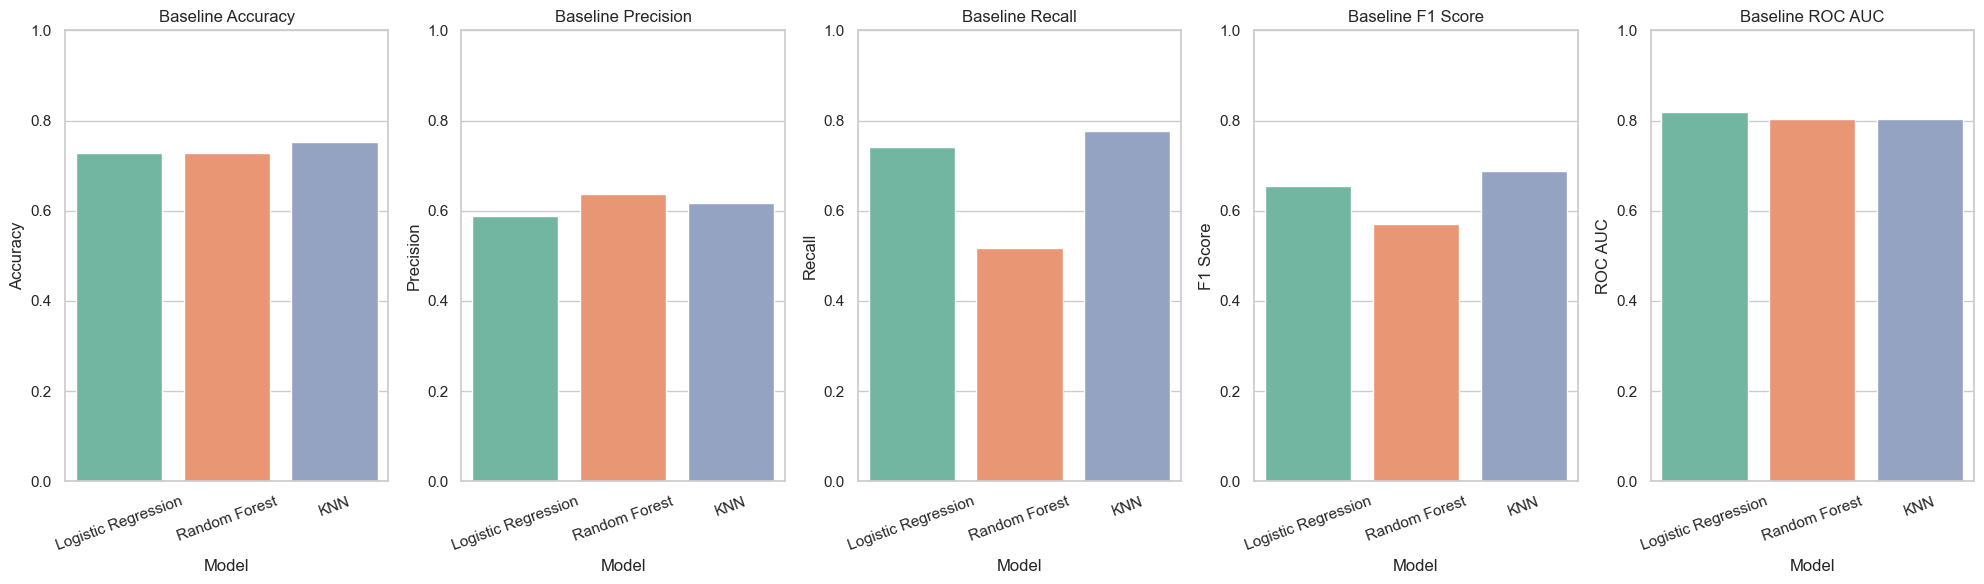

In [87]:
# Visualising Baseline Metrics Results
plt.figure(figsize=(20, 6))
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']):
    plt.subplot(1, 5, i+1)
    sns.barplot(data=results_df, x='Model', y=metric, hue='Model', palette='Set2')
    plt.title(f'Baseline {metric}')
    plt.ylim(0, 1)
    plt.xticks(rotation=20)
    plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

**Interpretation**

**K-Nearest Neighbors (KNN)** demonstrated the **highest recall** and **overall balanced performance**, making it the **most suitable model for diabetes prediction** where identifying all true cases is critical. Logistic Regression is a viable alternative with strong discrimination ability, while Random Forest's low recall limits its utility in a medical screening context.

### 6.3 Best Model (Based on Recall) <a id="63-best-model-based-on-recall"></a>


In [88]:
best_model_name = results_df.sort_values(by='Recall', ascending=False).iloc[0]['Model']
print(f"\nBest Model Based on Recall: {best_model_name}")


Best Model Based on Recall: KNN


### 6.4 Hyperparameter Tuning of Best Model <a id="64-hyperparameter-tuning-of-best-model"></a>

In [89]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

if best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
    } # Hyperparameter grid

    grid = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), 
                        param_grid, scoring='recall', cv=cv) # GridSearchCV with recall as the scoring metric
    
    grid.fit(X_train_log, y_train) # Fitting model

    # Best estimator and predictions
    best_model = grid.best_estimator_
    best_pred = best_model.predict(X_test_log)
    best_proba = best_model.predict_proba(X_test_log)[:, 1]

elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    } # Hyperparameter grid

    grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                        param_grid, scoring='recall', cv=cv) # GridSearchCV with recall as the scoring metric
    
    grid.fit(X_train_rf, y_train) # Fitting model

    # Best estimator and predictions
    best_model = grid.best_estimator_
    best_pred = best_model.predict(X_test_rf)
    best_proba = best_model.predict_proba(X_test_rf)[:, 1]

else:  # KNN
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # Manhattan and Euclidean
    } # Hyperparameter grid

    grid = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='recall', cv=cv) # GridSearchCV with recall as the scoring metric

    grid.fit(X_knn, y_knn) # Fitting model

    # Best estimator and predictions
    best_model = grid.best_estimator_
    best_pred = best_model.predict(X_test_knn)
    best_proba = best_model.predict_proba(X_test_knn)[:, 1]

print(f"\nBest Parameters for {best_model_name}: {grid.best_params_}")


Best Parameters for KNN: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


### 6.5 Tuned Model Evaluation  <a id="65-tuned-model-evaluation"></a>

In [90]:
# Calculate tuned metrics (Accuracy, Precision, Recall, F1 Score, ROC AUC)
accuracy_tuned = accuracy_score(y_test, best_pred)
precision_tuned = precision_score(y_test, best_pred)
recall_tuned = recall_score(y_test, best_pred)
f1_tuned = f1_score(y_test, best_pred)
roc_auc_tuned = roc_auc_score(y_test, best_proba)

# Print results
print(f"Evaluation of Tuned {best_model_name}")
print(f"Accuracy:  {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall:    {recall_tuned:.4f}")
print(f"F1 Score:  {f1_tuned:.4f}")
print(f"ROC AUC:   {roc_auc_tuned:.4f}")

Evaluation of Tuned KNN
Accuracy:  0.7532
Precision: 0.6176
Recall:    0.7778
F1 Score:  0.6885
ROC AUC:   0.7959


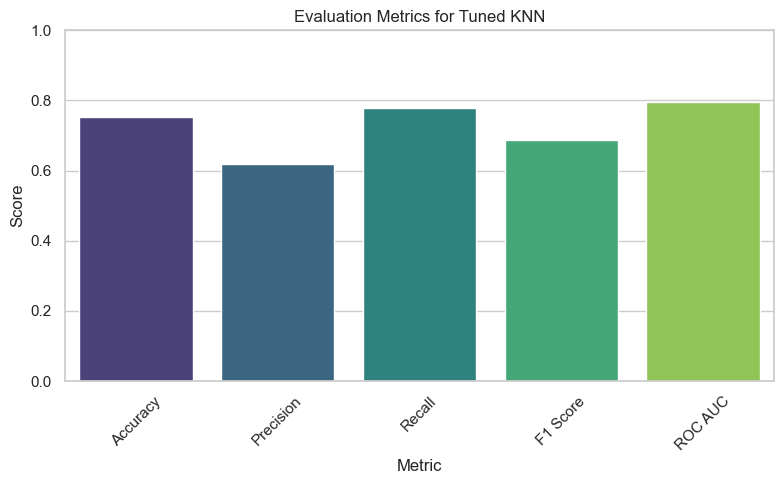

In [91]:
# Setting tuned metrics into a dataframe
metrics_tuned = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy_tuned, precision_tuned, recall_tuned, f1_tuned, roc_auc_tuned]
})

# Visualizing tuned metrics results
plt.figure(figsize=(8, 5))
sns.barplot(data=metrics_tuned, x='Metric', y='Score', hue='Metric', palette='viridis')
plt.ylim(0, 1)
plt.title(f"Evaluation Metrics for Tuned {best_model_name}")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

**Interpretation**

The **tuned K-Nearest Neighbors (KNN)** model maintained strong performance with a **recall of 0.7778**, affirming its effectiveness in correctly identifying diabetes cases—crucial for medical applications. With an **accuracy of 0.7532**, **F1 score of 0.6885**, and a **ROC AUC of 0.7959**, the model continues to offer a well-balanced and clinically reliable solution for early diabetes detection.


### 6.6 Confusion Matrix for Tuned Model <a id="66-confusion-matric-for-tuned-model"></a>

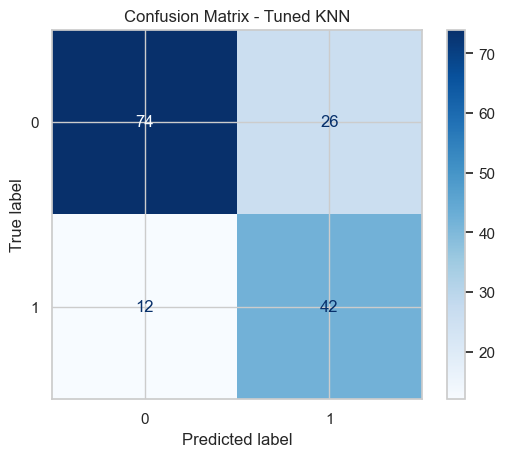

In [92]:
# Plot the confusion matrix for the tuned KNN model to visualize classification performance
cm = confusion_matrix(y_test, best_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - Tuned {best_model_name}")
plt.show()

**Key Metrics**

**1. True Negatives (TN):** 74

Model correctly predicted 74 non-diabetic patients as non-diabetic.

**2. False Positives (FP):** 26

Model incorrectly predicted 26 non-diabetic patients as diabetic.

**3. False Negatives (FN):** 12

Model incorrectly predicted 12 diabetic patients as non-diabetic.

**4. True Positives (TP):** 42

Model correctly predicted 42 diabetic patients as diabetic.

**Interpretation**

The model performs reasonably well, especially with a recall of ~78%, which is crucial in healthcare—correctly identifying actual diabetic cases is more important than falsely predicting a few non-diabetics as diabetic.

However, precision is moderate (62%), indicating that out of all predicted diabetic cases, about 38% were actually non-diabetic (false alarms).

False positives (26) are higher than false negatives (12), which may be acceptable in a medical screening context where early intervention is better than missing a diagnosis.

### 6.7 Feature Importance / Coefficients for Tuned Model <a id="67-feature-importance--coefficients-for-tuned-model"></a>

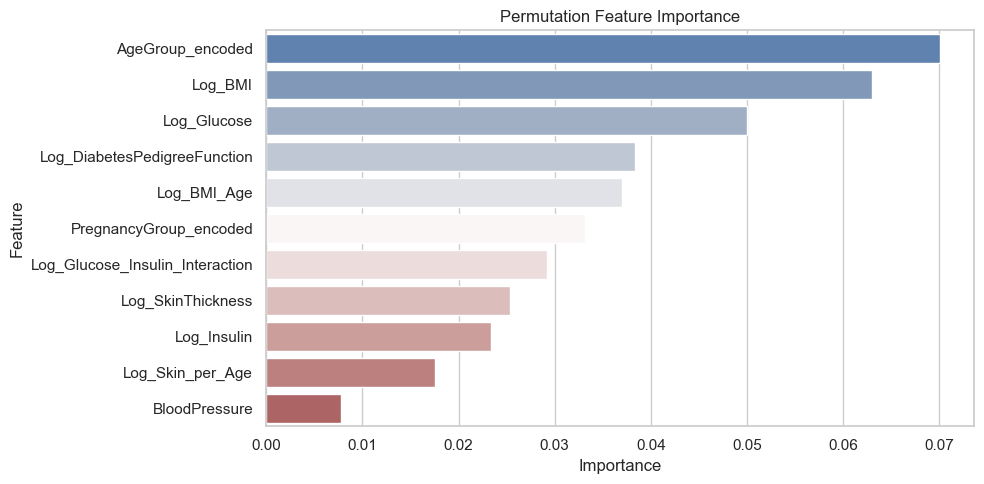

In [93]:
# Check which model performed best
if best_model_name == 'Logistic Regression':
    # Extract coefficients for each feature from the logistic regression model
    log_features = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_model.coef_[0]
    }).sort_values(by='Coefficient', key=abs, ascending=False) # Sort by absolute coefficient values

    # Plot feature coefficients
    plt.figure(figsize=(10, 5))
    sns.barplot(data=log_features, x='Coefficient', y='Feature', hue='Feature', palette='coolwarm')
    plt.title("Logistic Regression Feature Coefficients")
    plt.axvline(0, color='black', linewidth=0.7)
    plt.legend([],[], frameon=False) # Remove legend
    plt.show()

elif best_model_name == 'Random Forest':
    # Extract feature importances from the random forest model
    rf_features = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False) # Sort features by importance

    # Plot feature importances
    plt.figure(figsize=(10, 5))
    sns.barplot(data=rf_features, x='Importance', y='Feature', hue='Feature', palette='viridis')
    plt.title("Random Forest Feature Importance")
    plt.legend([],[], frameon=False) # Remove legend
    plt.tight_layout()
    plt.show()

else:
    # For KNN, use permutation importance
    result = permutation_importance(best_model, X_test_knn, y_test, n_repeats=10, random_state=42)
    # Create DataFrame of feature importances
    knn_features = pd.DataFrame({
        'Feature': X_test_knn.columns,
        'Importance': result.importances_mean
    }).sort_values(by='Importance', ascending=False)
    
    # Plot permutation feature importances
    plt.figure(figsize=(10,5))
    sns.barplot(data=knn_features, x='Importance', y='Feature', hue='Feature', palette='vlag')
    plt.title("Permutation Feature Importance")
    plt.legend([],[], frameon=False) # Remove legend
    plt.tight_layout()
    plt.show()

**Interpretation**

**Top predictive features** are:

1. AgeGroup_encoded

2. Log_BMI

3. Log_Glucose

4. Log_DiabetesPedigreeFunction

5. Log_BMI_Age

Features related to age, body mass index, and glucose are most important. This is consistent with clinical knowledge.

**Least important features** are:

1. BloodPressure

2. Log_Skin_per_Age

3. Log_Insulin

These features contributed less, possibly due to lower variability, weaker correlation with diabetes, or noise in the dataset.

### 6.8 Saving Best Model and Scaler

In [94]:
# Save best model
joblib.dump(best_model, 'best_diabetes_model.pkl')
print(f"\nBest Model saved as 'best_diabetes_model.pkl'")

# Save Scaler
print (f"\nScaler saved as:") 
joblib.dump(scaler, 'scaler.pkl')



Best Model saved as 'best_diabetes_model.pkl'

Scaler saved as:


['scaler.pkl']

###
Back to :

- [Table of Contents](#table-of-contents)

## 7.0 CONCLUSION

This case study aimed to develop an **effective machine learning model** for the **early detection of diabetes** using the *Pima Indians Diabetes dataset*. Through a comprehensive pipeline involving data cleaning, exploratory data analysis, feature engineering, model building and evaluation, the potential of predictive analytics in healthcare was demonstrated.

Identification and imputation of missing values using the MICE (Multivariate Imputation by Chained Equations) method was firstly done, ensuring data quality and consistency. The exploratory and statistical analyses highlighted important relationships between diabetes status and clinical features such as glucose level, BMI, and age.

Multiple models were trained and evaluated, with recall as the primary metric due to the clinical importance of minimizing false negatives in diabetes diagnosis. After baseline comparisons and hyperparameter tuning, the **K-Nearest Neighbours (KNN)** emerged as the best-performing model, showing strong recall and overall predictive performance.

The final model's insights, such as feature importance rankings, aligned well with established medical knowledge, further supporting the model’s validity. This confirms that data-driven approaches can significantly aid in early screening, potentially improving patient outcomes through timely intervention.

Overall, this project highlights the value of machine learning in healthcare analytics and serves as a foundational step toward more advanced predictive modeling in medical diagnostics. Future work could explore model deployment, integration with electronic health records (EHRs), or expansion to larger, more diverse datasets.

##
Back to :

- [Table of Contents](#table-of-contents)

